In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

In [5]:
df = pd.read_excel("../../data/agro_forestry_optimization.xlsx")

In [6]:
df.head()

,Sex,Age_Head_family,Education,Main activity,Family_size,Banana_area,Coffee_Area,Peas_Area,Beans_Area,Soybeans_Area,...,Net Income Cow Peas,Net Income Agroforestry trees,Net income Legume,Net Income Coffee,Net Income Animal,Net Income Agriculture,Net Income Agri & Livestok,R_Vital,SDAM_Tr,SCA
0,1,81,1,1,5,700,736,NaN,2772,NaN,...,0,0,0,66050,34400,253250,287650,3675492,1,1
1,1,61,2,1,5,10000,1421,NaN,5000,NaN,...,0,25000,0,67625,359400,130825,490225,3675492,2,1
2,1,63,1,1,5,300,3080,NaN,1250,NaN,...,0,0,0,66050,379400,1187850,1567250,3675492,1,1
3,1,72,1,1,4,10000,1500,2000.0,2000,230.0,...,0,0,0,-40400,505000,700200,1205200,3675492,1,1
4,1,69,1,1,6,450,1030,NaN,8560,NaN,...,0,160000,30000,32550,630000,1703550,2333550,3675492,1,2


In [7]:
# Generate descriptive statistics for all numerical columns
summary_stats = df.describe(include='all')

# Display the descriptive statistics
print(summary_stats)


              Sex  Age_Head_family   Education  Main activity  Family_size  \
count  164.000000       164.000000  164.000000     164.000000   164.000000   
mean     1.158537        61.682927    1.542683       1.018293     5.304878   
std      0.366362        10.913354    0.676971       0.174179     2.321883   
min      1.000000        34.000000    0.000000       1.000000     1.000000   
25%      1.000000        54.000000    1.000000       1.000000     4.000000   
50%      1.000000        63.000000    2.000000       1.000000     5.000000   
75%      1.000000        70.000000    2.000000       1.000000     7.000000   
max      2.000000        86.000000    3.000000       3.000000    11.000000   

        Banana_area   Coffee_Area    Peas_Area    Beans_Area  Soybeans_Area  \
count    164.000000    164.000000    22.000000    164.000000       11.00000   
mean    4702.371951   1432.432927  1249.318182   3476.152439      690.00000   
std     7086.006835   2123.785864  1089.102181   2655.281884

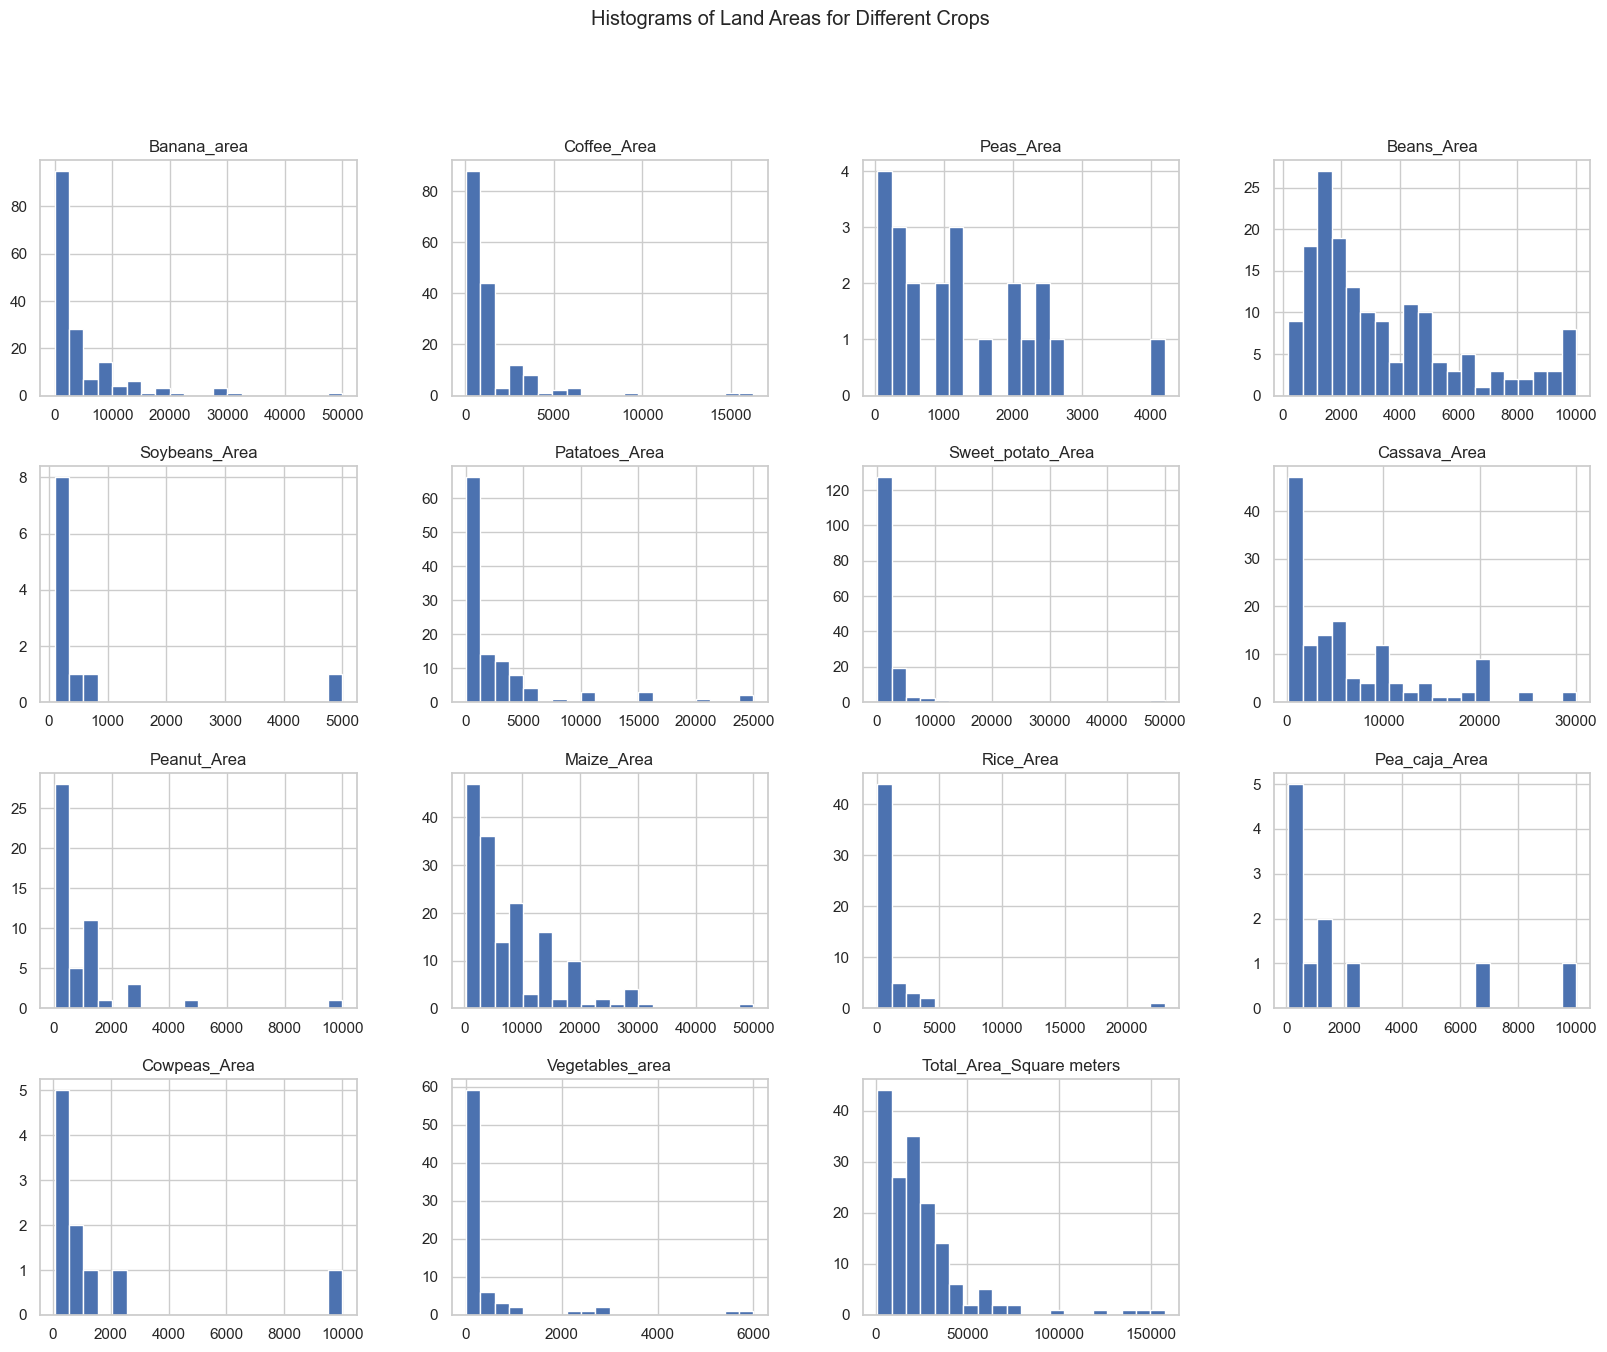

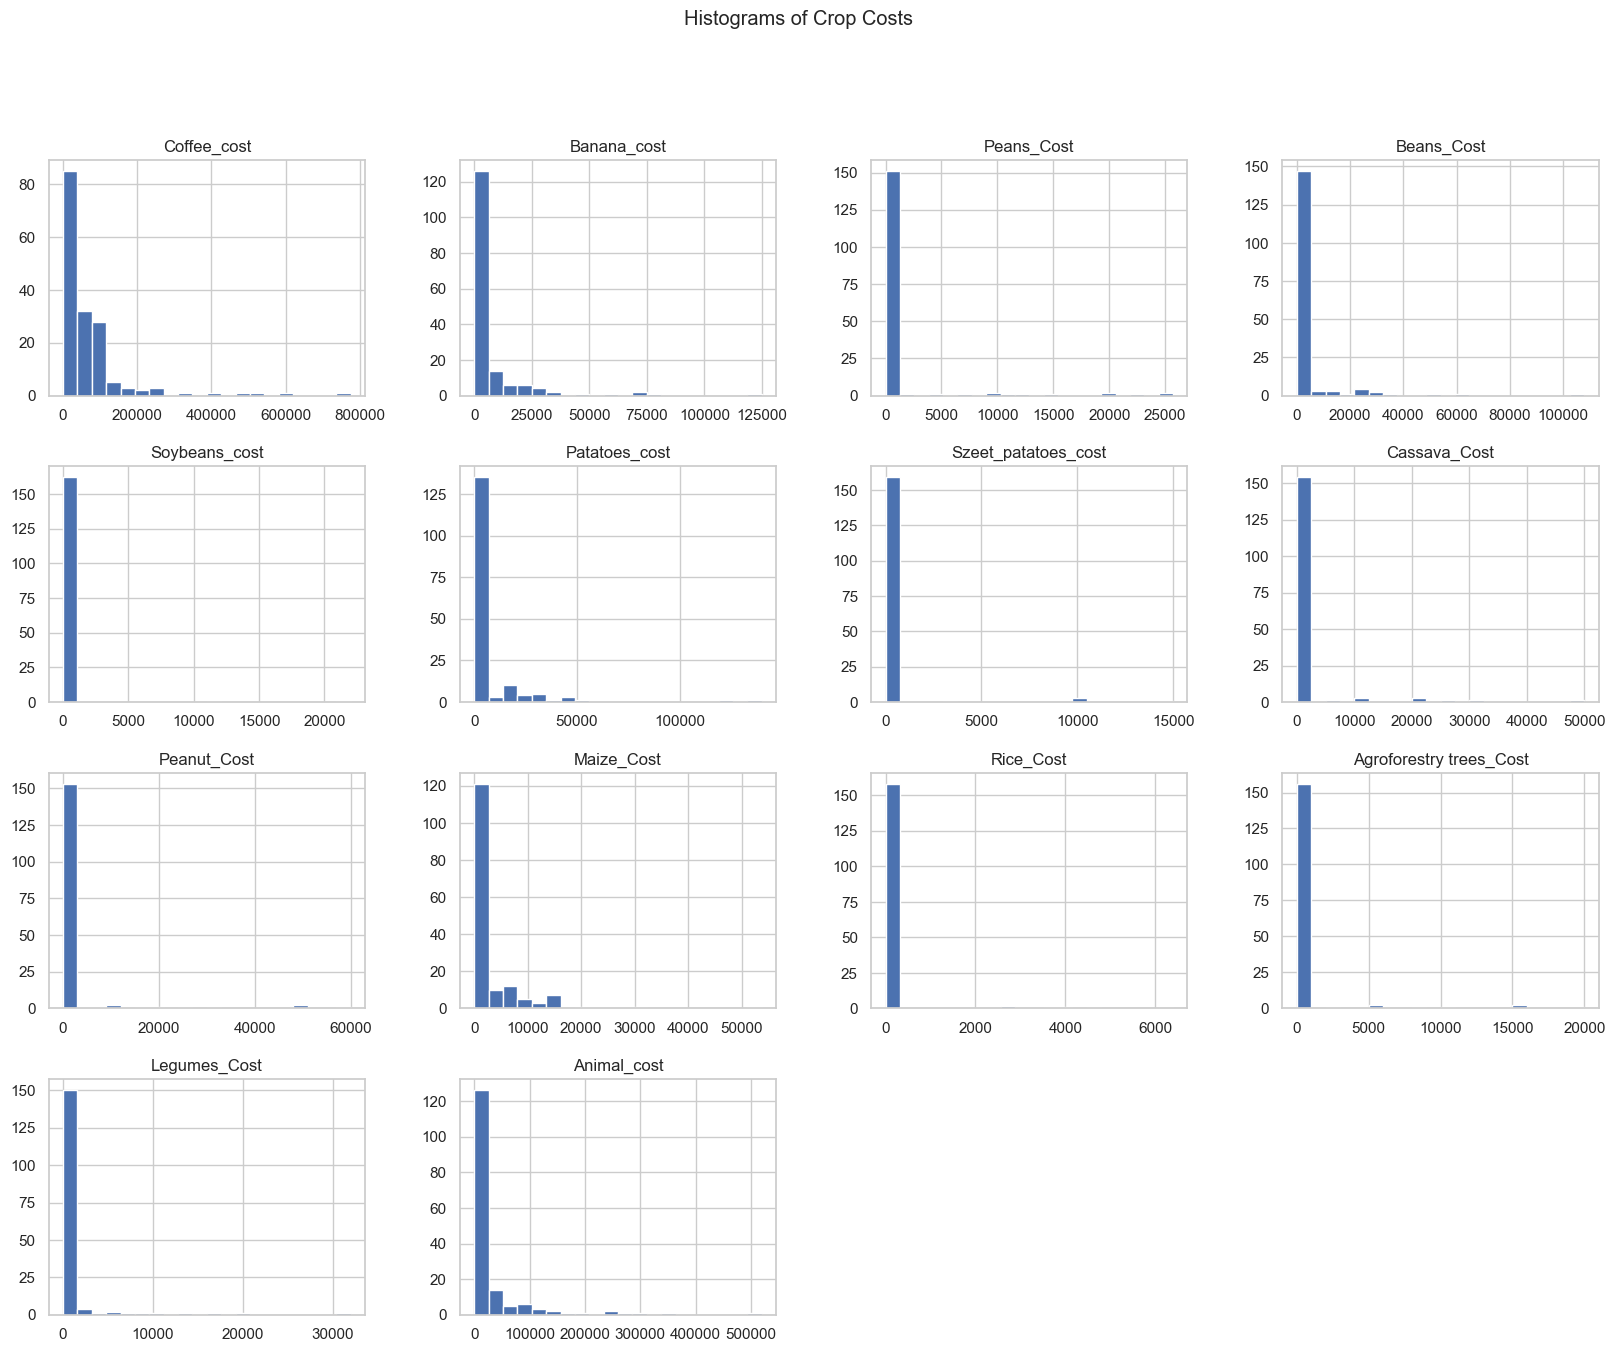

In [10]:
# Select columns related to land area and costs
area_columns = ['Banana_area', 'Coffee_Area', 'Peas_Area', 'Beans_Area', 'Soybeans_Area', 
                'Patatoes_Area', 'Sweet_potato_Area', 'Cassava_Area', 'Peanut_Area', 
                'Maize_Area', 'Rice_Area', 'Pea_caja_Area', 'Cowpeas_Area', 'Vegetables_area', 
                'Total_Area_Square meters']

cost_columns = ['Coffee_cost', 'Banana_cost', 'Peans_Cost', 'Beans_Cost', 'Soybeans_cost', 
                'Patatoes_cost', 'Szeet_patatoes_cost', 'Cassava_Cost', 'Peanut_Cost', 
                'Maize_Cost', 'Rice_Cost', 'Agroforestry trees_Cost', 'Legumes_Cost', 
                'Animal_cost']

# Plot histograms for land area columns
df[area_columns].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Land Areas for Different Crops')
plt.show()

# Plot histograms for cost columns
df[cost_columns].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Crop Costs')
plt.show()


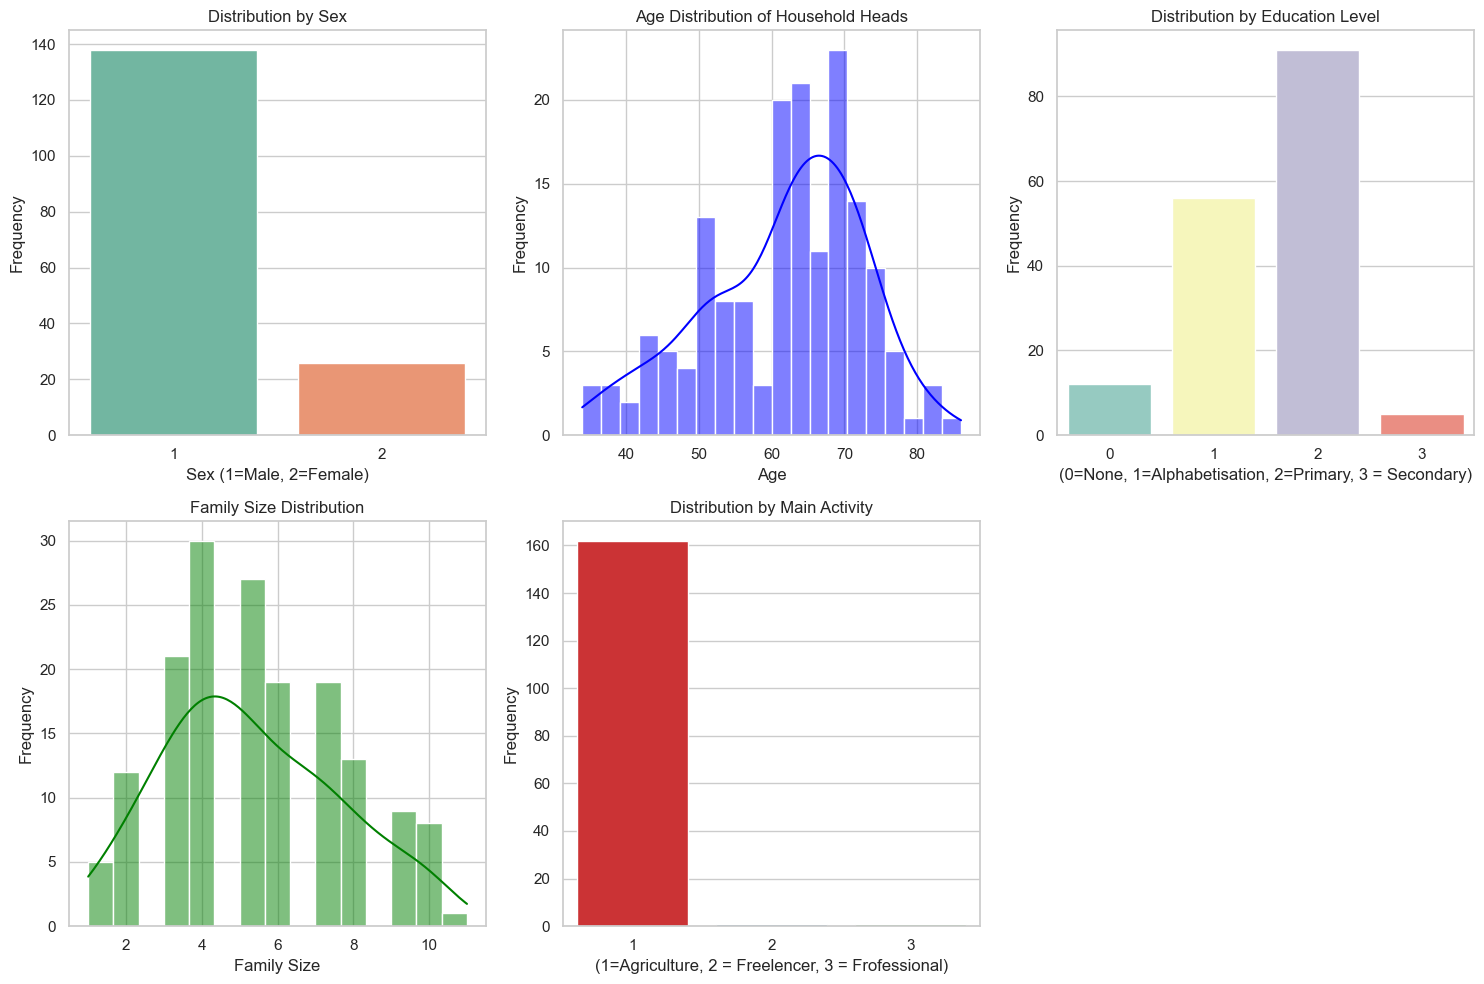

In [163]:
# Define the figure and axes for plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Distribution by Sex
sns.countplot(x='Sex', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribution by Sex')
axes[0, 0].set_xlabel('Sex (1=Male, 2=Female)')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Distribution by Age of Household Head
sns.histplot(df['Age_Head_family'], bins=20, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Age Distribution of Household Heads')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Distribution by Education Level
sns.countplot(x='Education', data=df, ax=axes[0, 2], palette='Set3')
axes[0, 2].set_title('Distribution by Education Level')
axes[0, 2].set_xlabel('(0=None, 1=Alphabetisation, 2=Primary, 3 = Secondary)')
axes[0, 2].set_ylabel('Frequency')

# Plot 4: Distribution of Family Size
sns.histplot(df['Family_size'], bins=15, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Family Size Distribution')
axes[1, 0].set_xlabel('Family Size')
axes[1, 0].set_ylabel('Frequency')

# Plot 5: Distribution by Main Activity
sns.countplot(x='Main activity', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Distribution by Main Activity')
axes[1, 1].set_xlabel('(1=Agriculture, 2 = Freelencer, 3 = Frofessional)')
axes[1, 1].set_ylabel('Frequency')

# Remove the empty plot (axes[1, 2])
fig.delaxes(axes[1, 2])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [11]:
# List of specific surface columns to fill NaN with 0
surface_columns = ['Banana_area', 'Coffee_Area', 'Peas_Area', 'Beans_Area',
       'Soybeans_Area', 'Patatoes_Area', 'Sweet_potato_Area', 'Cassava_Area',
       'Peanut_Area', 'Maize_Area', 'Rice_Area', 'Pea_caja_Area',
       'Cowpeas_Area', 'Vegetables_area']

# Replace NaN with 0 only in the specified surface columns
df[surface_columns] = df[surface_columns].fillna(0)

In [12]:
# Initialize an empty DataFrame to store the results
surface_area_stats = pd.DataFrame(columns=['Mean Area (m²)', 'Median Area (m²)'])

# Loop through each surface column and calculate the mean and median for values > 0
for surface in surface_columns:
    filtered_data = df[df[surface] > 0]  # Filter rows where surface area is greater than zero
    mean_value = filtered_data[surface].mean()
    median_value = filtered_data[surface].median()
    
    # Add the mean and median to the results DataFrame
    surface_area_stats.loc[surface] = [mean_value, median_value]

# Display the filtered statistics
print(surface_area_stats)

                   Mean Area (m²)  Median Area (m²)
Banana_area           4702.371951            2000.0
Coffee_Area           1432.432927             800.0
Peas_Area             1249.318182            1050.0
Beans_Area            3476.152439            2500.0
Soybeans_Area          690.000000             230.0
Patatoes_Area         2659.318584             960.0
Sweet_potato_Area     1686.385621             500.0
Cassava_Area          6422.210145            4500.0
Peanut_Area            995.000000             380.0
Maize_Area            8212.550000            5000.0
Rice_Area             1149.818182             360.0
Pea_caja_Area         2140.363636             900.0
Cowpeas_Area          1556.000000             420.0
Vegetables_area        470.421053             100.0


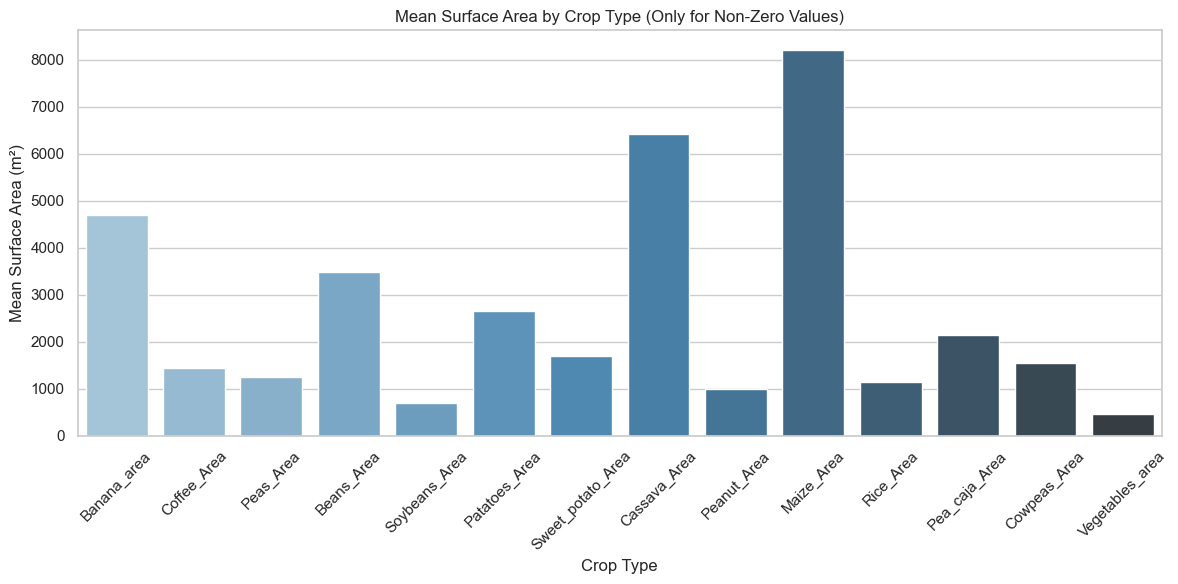

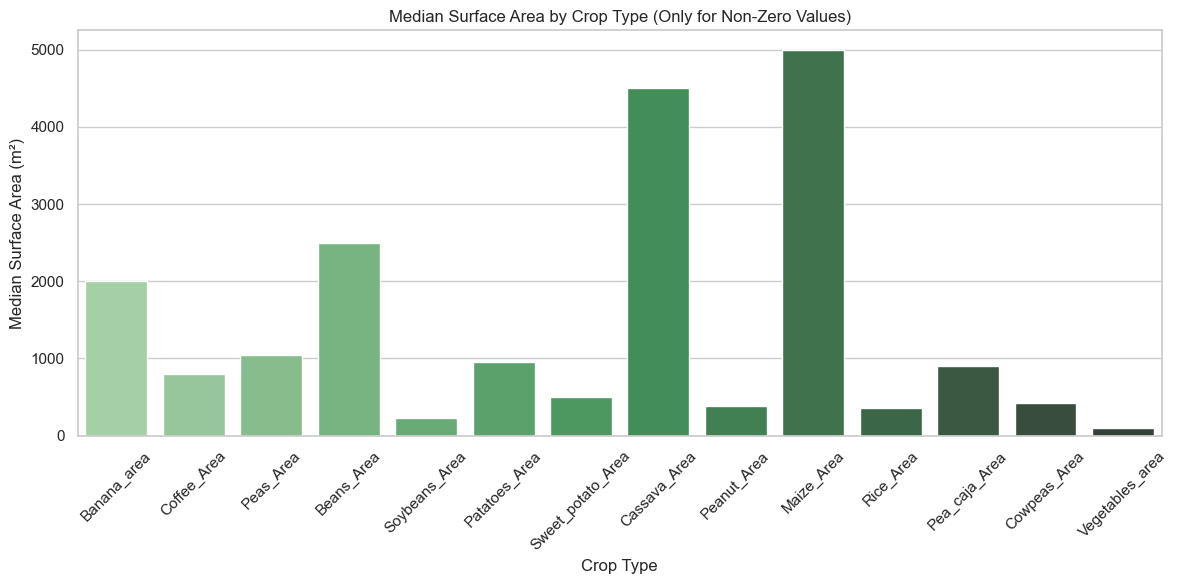

In [13]:
# Plotting the Mean Area for each surface
plt.figure(figsize=(12, 6))
sns.barplot(x=surface_area_stats.index, y=surface_area_stats['Mean Area (m²)'], palette="Blues_d")
plt.title('Mean Surface Area by Crop Type (Only for Non-Zero Values)')
plt.xlabel('Crop Type')
plt.ylabel('Mean Surface Area (m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Median Area for each surface
plt.figure(figsize=(12, 6))
sns.barplot(x=surface_area_stats.index, y=surface_area_stats['Median Area (m²)'], palette="Greens_d")
plt.title('Median Surface Area by Crop Type (Only for Non-Zero Values)')
plt.xlabel('Crop Type')
plt.ylabel('Median Surface Area (m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

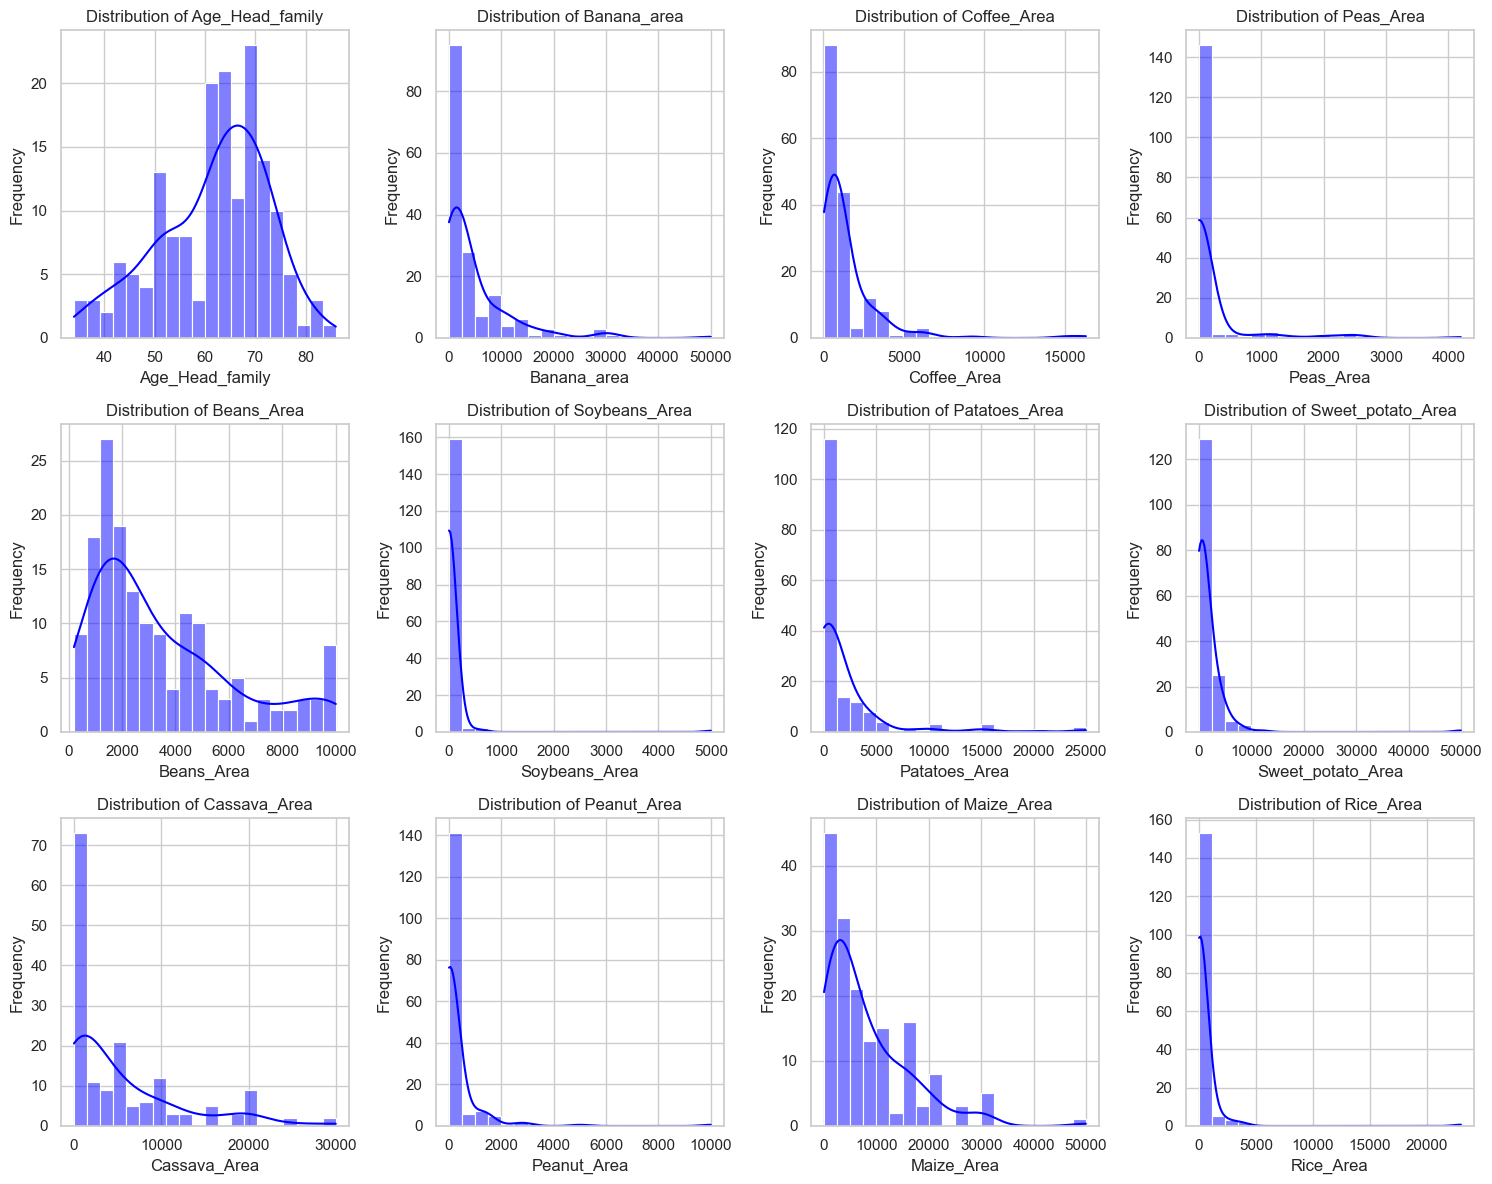

In [14]:
# Define a list of continuous variables for which we want to plot histograms
continuous_variables = ['Age_Head_family', 'Banana_area', 'Coffee_Area', 'Peas_Area', 'Beans_Area', 
                        'Soybeans_Area', 'Patatoes_Area', 'Sweet_potato_Area', 'Cassava_Area', 
                        'Peanut_Area', 'Maize_Area', 'Rice_Area']

# Create histograms for each continuous variable
plt.figure(figsize=(15, 12))

# Loop through each variable and create a histogram
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns for subplots
    sns.histplot(df[var], bins=20, kde=True, color='blue')  # kde=True to include density curve
    plt.title(f'Distribution of {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


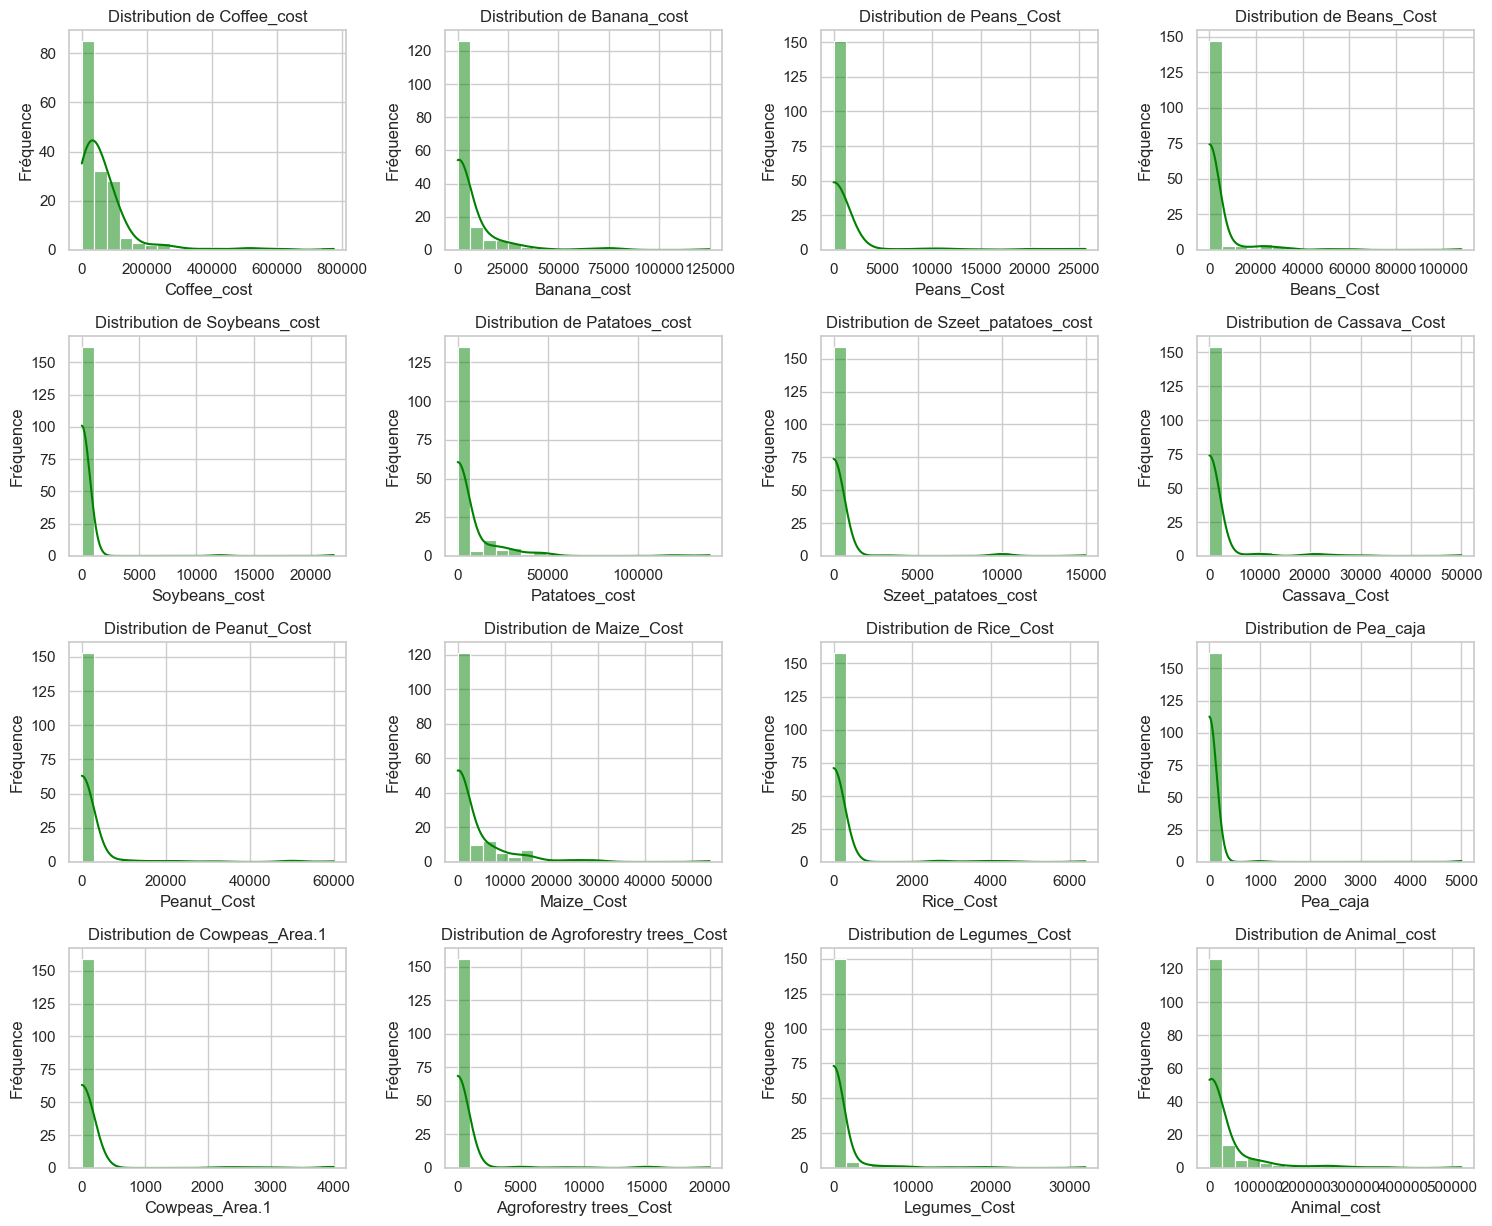

In [168]:
# Liste des variables des coûts de production
cost_variables = ['Coffee_cost', 'Banana_cost', 'Peans_Cost', 'Beans_Cost',
       'Soybeans_cost', 'Patatoes_cost', 'Szeet_patatoes_cost', 'Cassava_Cost',
       'Peanut_Cost', 'Maize_Cost', 'Rice_Cost', 'Pea_caja', 'Cowpeas_Area.1',
       'Agroforestry trees_Cost', 'Legumes_Cost', 'Animal_cost']

# Créer des histogrammes pour chaque variable de coût
plt.figure(figsize=(15, 15))

# Ajuster à 5 lignes et 4 colonnes pour 17 variables
for i, var in enumerate(cost_variables, 1):
    plt.subplot(5, 4, i)  # 5 lignes, 4 colonnes
    sns.histplot(df[var], bins=20, kde=True, color='green')  # kde=True pour inclure la courbe de densité
    plt.title(f'Distribution de {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

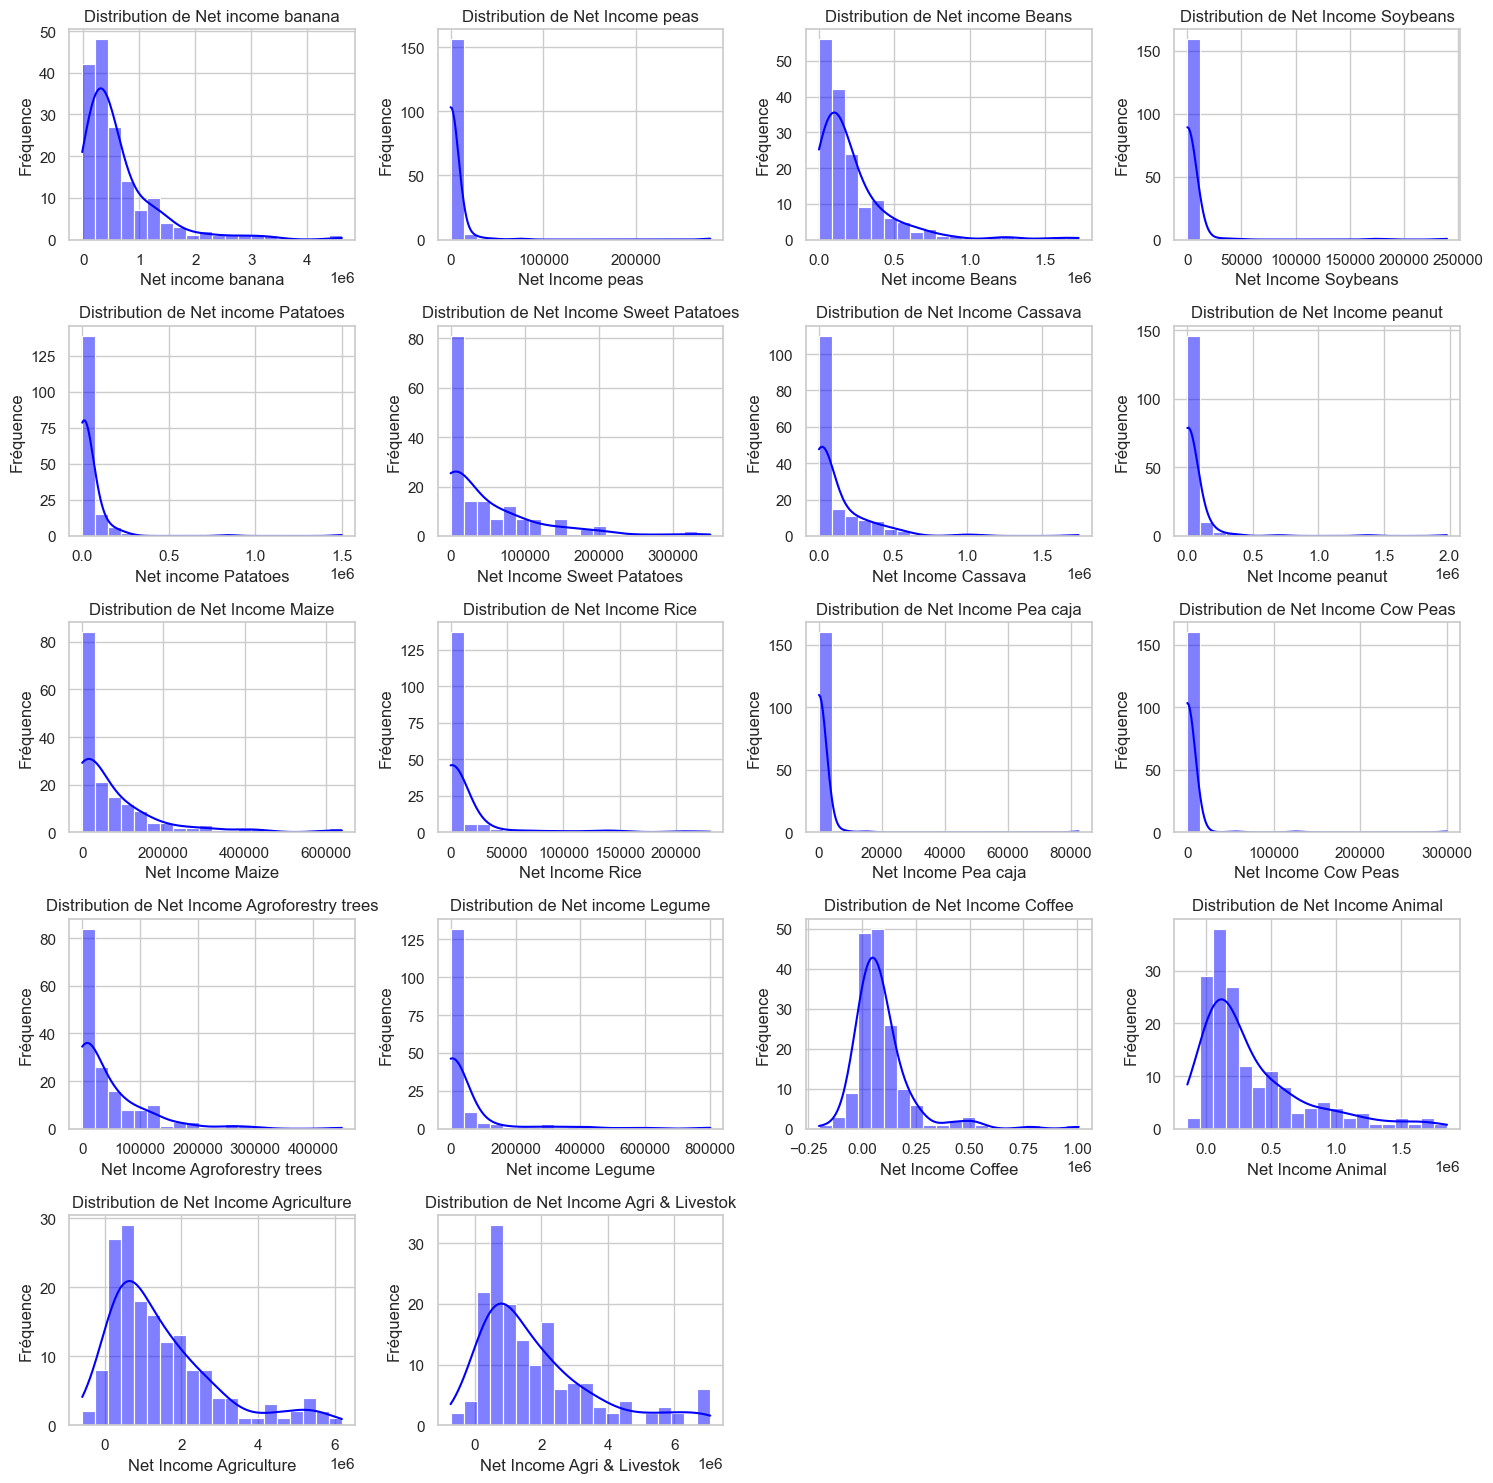

In [169]:
revenue_variables = ['Net income banana', 'Net Income peas', 'Net income Beans',
       'Net Income Soybeans', 'Net income Patatoes',
       'Net Income Sweet Patatoes', 'Net Income Cassava', 'Net Income peanut',
       'Net Income Maize', 'Net Income Rice', 'Net Income Pea caja',
       'Net Income Cow Peas', 'Net Income Agroforestry trees',
       'Net income Legume', 'Net Income Coffee', 'Net Income Animal',
       'Net Income Agriculture', 'Net Income Agri & Livestok']

# Créer des histogrammes pour chaque variable de revenu
plt.figure(figsize=(15, 15))

# Ajuster à 5 lignes et 4 colonnes pour afficher les 17 variables
for i, var in enumerate(revenue_variables, 1):
    plt.subplot(5, 4, i)  # 5 lignes, 4 colonnes
    sns.histplot(df[var], bins=20, kde=True, color='blue')  # kde=True pour inclure la courbe de densité
    plt.title(f'Distribution de {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

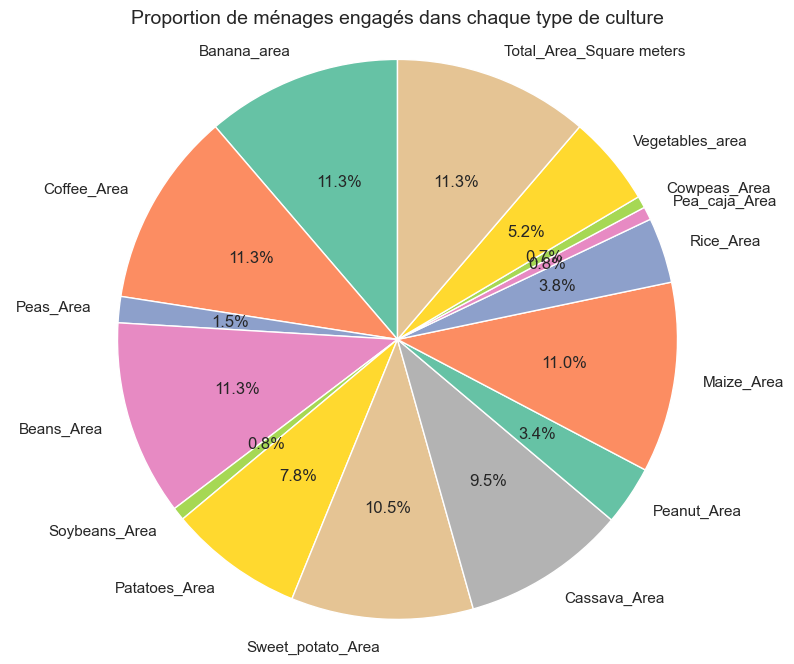

In [15]:
# Liste des variables de superficies des cultures
crop_variables = ['Banana_area', 'Coffee_Area', 'Peas_Area', 'Beans_Area', 'Soybeans_Area', 
                'Patatoes_Area', 'Sweet_potato_Area', 'Cassava_Area', 'Peanut_Area', 
                'Maize_Area', 'Rice_Area', 'Pea_caja_Area', 'Cowpeas_Area', 'Vegetables_area', 
                'Total_Area_Square meters']

# Calculer la proportion de ménages engagés dans chaque type de culture
cultures_presentes = (df[crop_variables] > 0).sum()

# Créer un graphique en secteurs
plt.figure(figsize=(10, 8))
plt.pie(cultures_presentes, labels=cultures_presentes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Proportion de ménages engagés dans chaque type de culture', fontsize=14)
plt.axis('equal')  # Assure que le graphique est circulaire
plt.show()


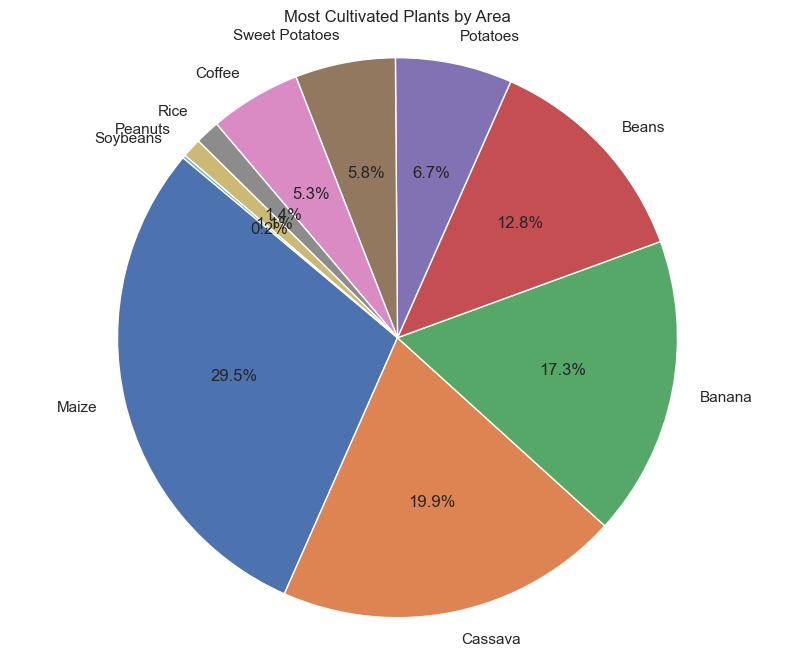

In [18]:
# Define the areas for the most cultivated plants
plant_areas = {
    'Banana': df['Banana_area'].sum(),
    'Coffee': df['Coffee_Area'].sum(),
    'Beans': df['Beans_Area'].sum(),
    'Soybeans': df['Soybeans_Area'].sum(),
    'Potatoes': df['Patatoes_Area'].sum(),
    'Sweet Potatoes': df['Sweet_potato_Area'].sum(),
    'Cassava': df['Cassava_Area'].sum(),
    'Peanuts': df['Peanut_Area'].sum(),
    'Maize': df['Maize_Area'].sum(),
    'Rice': df['Rice_Area'].sum(),

}

# Convert the dictionary to a DataFrame for better handling
plant_areas_df = pd.DataFrame(list(plant_areas.items()), columns=['Plant', 'Area'])

# Sort the DataFrame by area in descending order
plant_areas_df = plant_areas_df.sort_values(by='Area', ascending=False)

# Create a pie chart for the most cultivated plants
plt.figure(figsize=(10, 8))
plt.pie(plant_areas_df['Area'], labels=plant_areas_df['Plant'], autopct='%1.1f%%', startangle=140)
plt.title('Most Cultivated Plants by Area')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [172]:
# Create a DataFrame to count the number of households cultivating each plant
cultivation_count = {
    'Banana': (df['Banana_area'] > 0).sum(),
    'Coffee': (df['Coffee_Area'] > 0).sum(),
    'Peas': (df['Peas_Area'] > 0).sum(),
    'Beans': (df['Beans_Area'] > 0).sum(),
    'Soybeans': (df['Soybeans_Area'] > 0).sum(),
    'Potatoes': (df['Patatoes_Area'] > 0).sum(),
    'Sweet Potatoes': (df['Sweet_potato_Area'] > 0).sum(),
    'Cassava': (df['Cassava_Area'] > 0).sum(),
    'Peanuts': (df['Peanut_Area'] > 0).sum(),
    'Maize': (df['Maize_Area'] > 0).sum(),
    'Rice': (df['Rice_Area'] > 0).sum()
}

# Convert the dictionary to a DataFrame for better handling
cultivation_count_df = pd.DataFrame(list(cultivation_count.items()), columns=['Plant', 'Households'])

# Sort the DataFrame by the number of households in descending order
cultivation_count_df = cultivation_count_df.sort_values(by='Households', ascending=False)

# Display the most cultivated plant
most_cultivated_plant = cultivation_count_df.iloc[0]
print(f"The most cultivated plant by the number of households is {most_cultivated_plant['Plant']} with {most_cultivated_plant['Households']} households.")


The most cultivated plant by the number of households is Banana with 164 households.


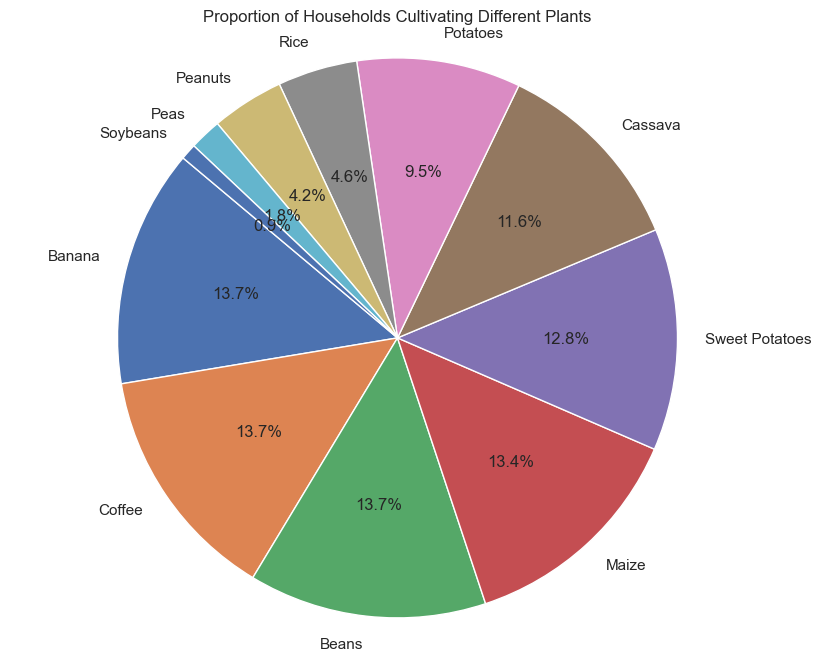

In [173]:
# Plotting the pie chart for the number of households cultivating each plant
plt.figure(figsize=(10, 8))

# Creating the pie chart
plt.pie(cultivation_count_df['Households'], labels=cultivation_count_df['Plant'], autopct='%1.1f%%', startangle=140)

# Title and display the pie chart
plt.title('Proportion of Households Cultivating Different Plants')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


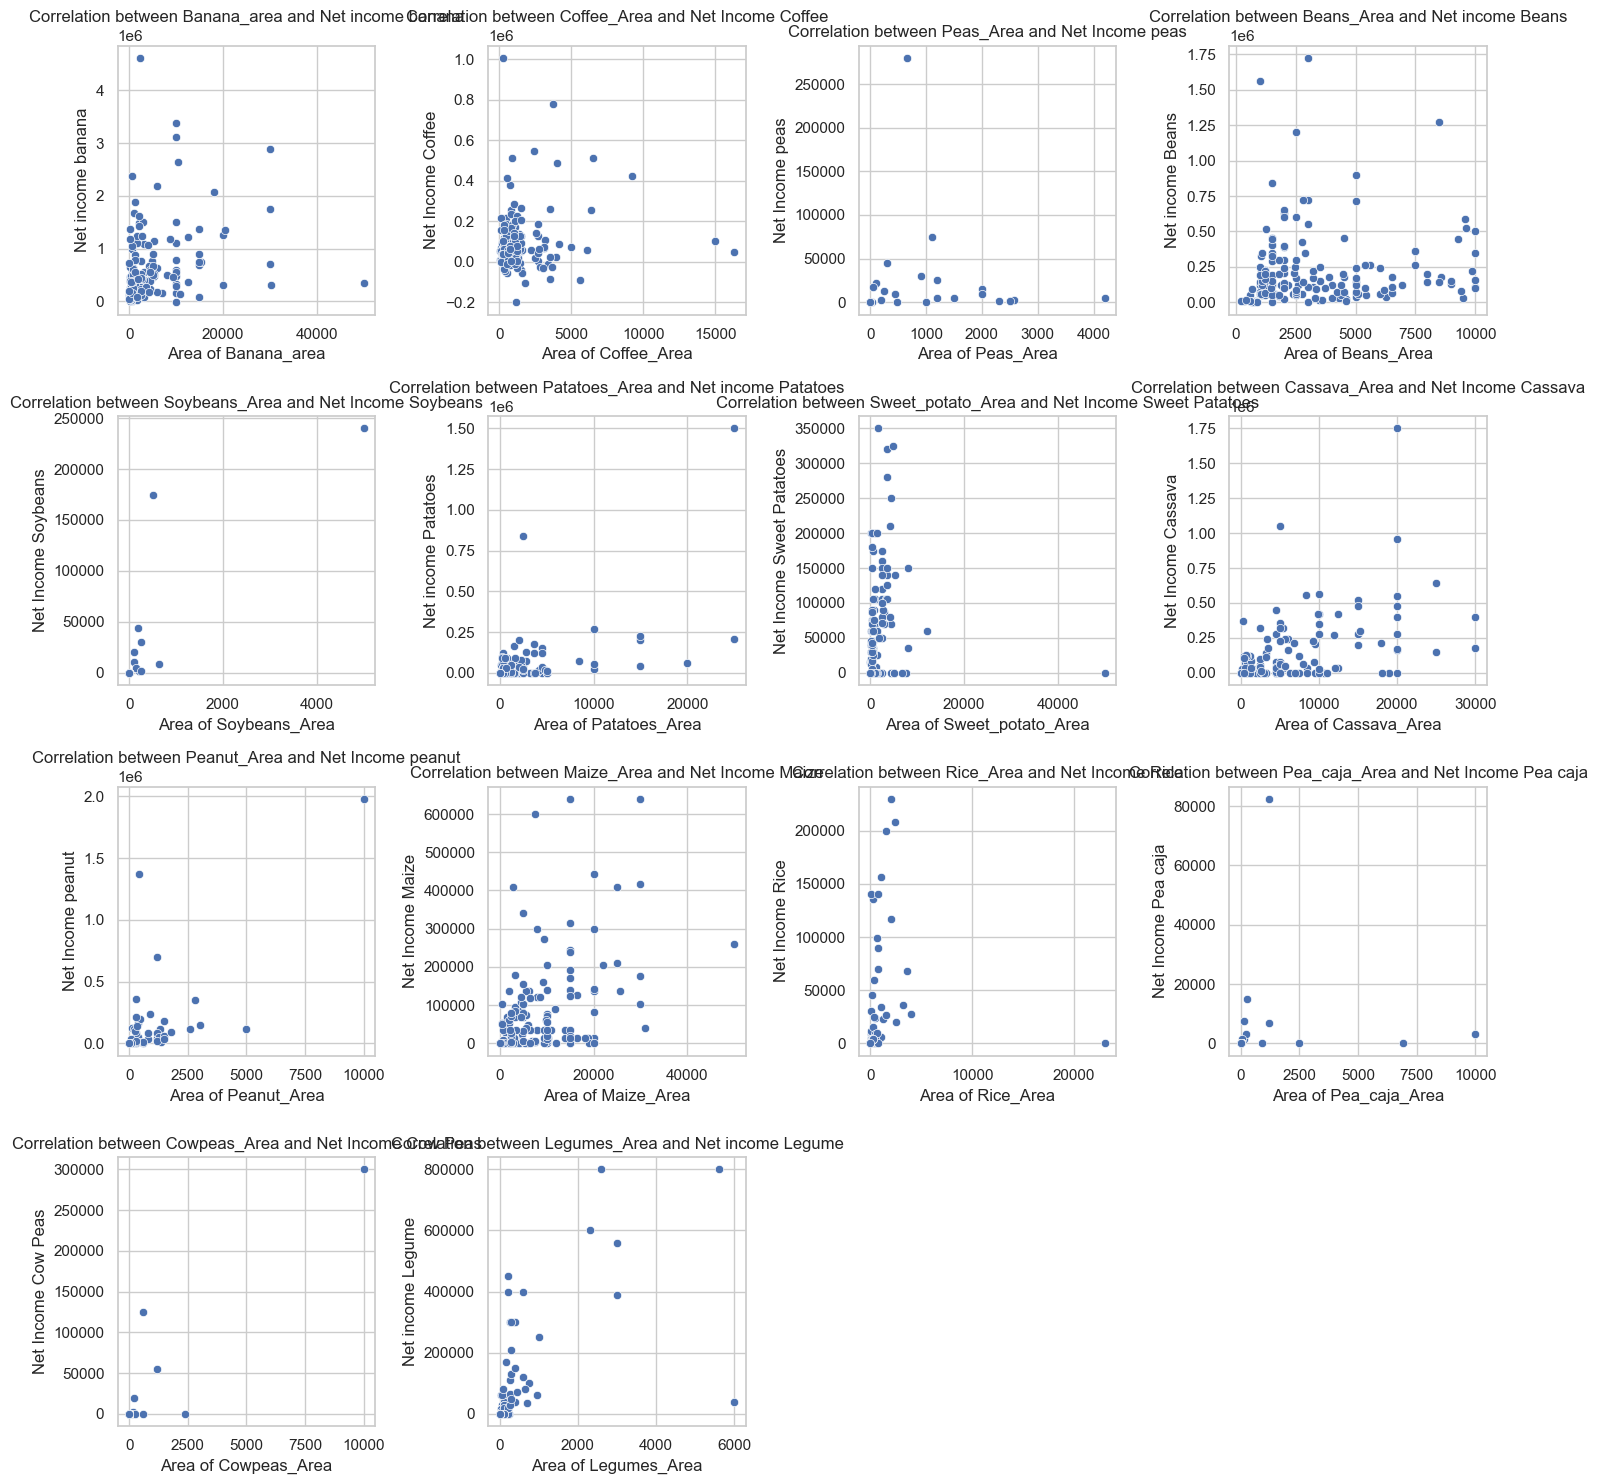

In [174]:
# Define a list of plants and their corresponding revenue columns
plants = [
    ('Banana_area', 'Net income banana'),
    ('Coffee_Area', 'Net Income Coffee'),
    ('Peas_Area', 'Net Income peas'),
    ('Beans_Area', 'Net income Beans'),
    ('Soybeans_Area', 'Net Income Soybeans'),
    ('Patatoes_Area', 'Net income Patatoes'),
    ('Sweet_potato_Area', 'Net Income Sweet Patatoes'),
    ('Cassava_Area', 'Net Income Cassava'),
    ('Peanut_Area', 'Net Income peanut'),
    ('Maize_Area', 'Net Income Maize'),
    ('Rice_Area', 'Net Income Rice'),
    ('Pea_caja_Area', 'Net Income Pea caja'),
    ('Cowpeas_Area', 'Net Income Cow Peas'),
    ('Legumes_Area', 'Net income Legume'),
]

# Create scatter plots for each plant area and its net income
plt.figure(figsize=(15, 15))

for i, (area_col, income_col) in enumerate(plants, 1):
    plt.subplot(4, 4, i)  # Adjust number of rows and columns as needed
    sns.scatterplot(x=df[area_col], y=df[income_col])
    plt.title(f'Correlation between {area_col} and {income_col}')
    plt.xlabel(f'Area of {area_col}')
    plt.ylabel(f'{income_col}')
    
plt.tight_layout()
plt.show()


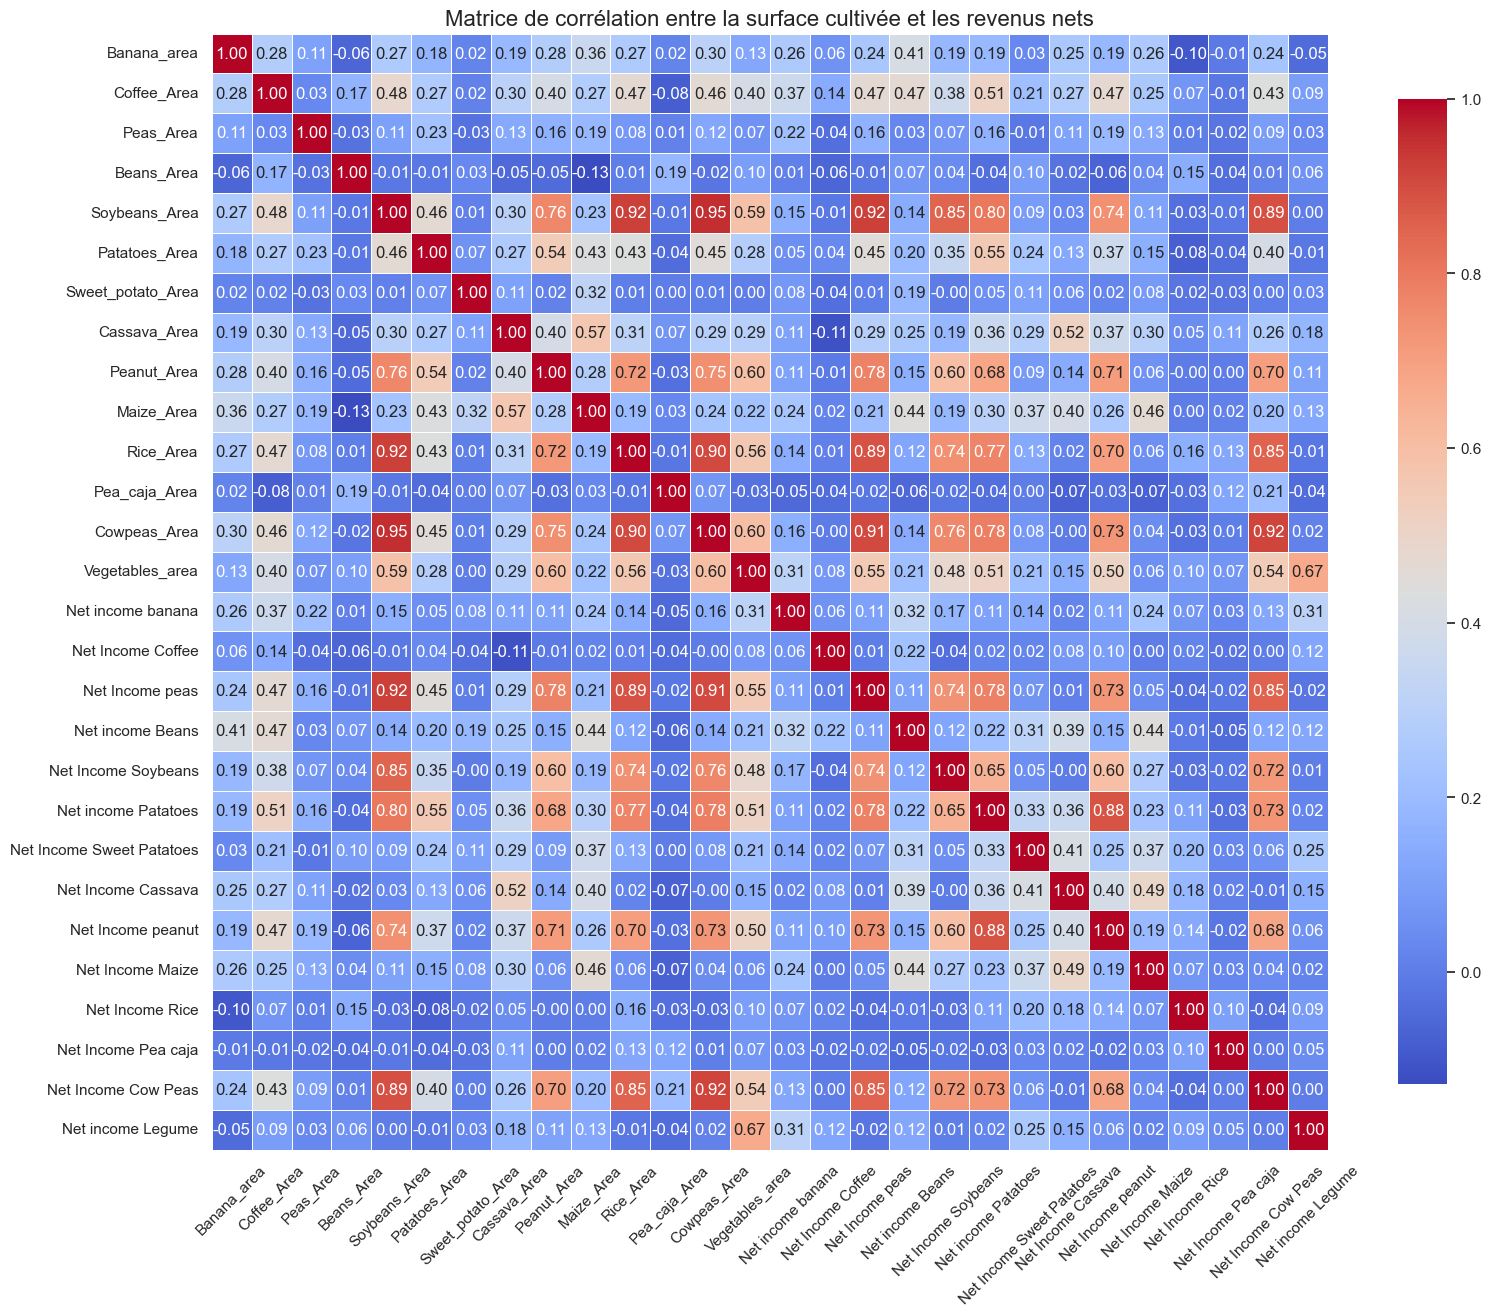

In [19]:
# Define area and revenue variables
area_variables = ['Banana_area', 'Coffee_Area', 'Peas_Area', 'Beans_Area', 
                  'Soybeans_Area', 'Patatoes_Area', 'Sweet_potato_Area', 
                  'Cassava_Area', 'Peanut_Area', 'Maize_Area', 
                  'Rice_Area', 'Pea_caja_Area', 'Cowpeas_Area', 
                  'Vegetables_area']

# Corresponding net income variables
revenue_variables = ['Net income banana', 'Net Income Coffee', 'Net Income peas', 
                     'Net income Beans', 'Net Income Soybeans', 'Net income Patatoes', 
                     'Net Income Sweet Patatoes', 'Net Income Cassava', 
                     'Net Income peanut', 'Net Income Maize', 
                     'Net Income Rice', 'Net Income Pea caja', 
                     'Net Income Cow Peas', 'Net income Legume']

# Filter area and revenue variables to only include those present in the DataFrame
area_variables = [var for var in area_variables if var in df.columns]
revenue_variables = [var for var in revenue_variables if var in df.columns]

# Create a new DataFrame with only the relevant columns
correlation_data = df[area_variables + revenue_variables]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Matrice de corrélation entre la surface cultivée et les revenus nets', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


                  Crop   Mean Revenue     Mean Cost     Net Profit  \
0               Coffee   91931.018293  69530.871951   22400.146341   
4             Pea caja     737.804878    143.560976     594.243902   
10            Patatoes   49414.634146   5762.195122   43652.439024   
12      Sweet Patatoes   49414.634146   5762.195122   43652.439024   
8               Animal  356829.292683  28519.817073  328309.475610   
7             Soybeans    3290.243902    207.317073    3082.926829   
2                Maize   75918.902439   3027.975610   72890.926829   
14              Peanut   46499.390244   1728.658537   44770.731707   
5              Cowpeas    3060.975610     95.731707    2965.243902   
11          Vegetables   46320.121951    835.365854   45484.756098   
1                Beans  220030.487805   3044.512195  216985.975610   
3                 Rice   13182.621951    145.731707   13036.890244   
9   Agroforestry trees   44612.804878    487.804878   44125.000000   
13             Cassa

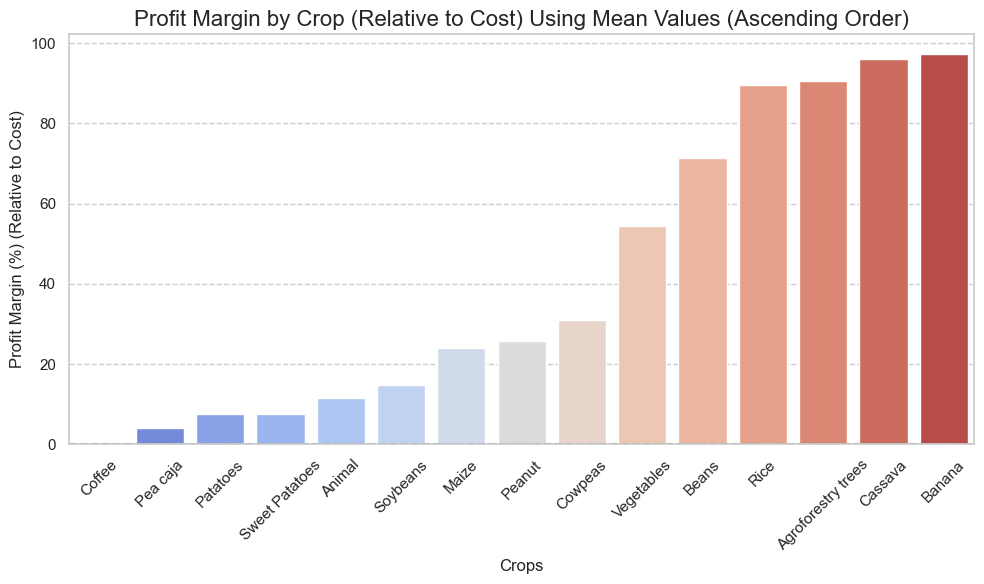

In [20]:
# Updated column names for revenue and cost per crop
crop_columns = {
    'Coffee': ['Net Income Coffee', 'Coffee_cost'],
    'Beans': ['Net income Beans', 'Beans_Cost'],
    'Maize': ['Net Income Maize', 'Maize_Cost'],
    'Rice': ['Net Income Rice', 'Rice_Cost'],
    'Pea caja': ['Net Income Pea caja', 'Pea_caja_Area'],
    'Cowpeas': ['Net Income Cow Peas', 'Cowpeas_Area.1'],
    'Banana': ['Net income banana', 'Banana_cost'],
    'Soybeans': ['Net Income Soybeans', 'Soybeans_cost'],
    'Animal': ['Net Income Animal', 'Animal_cost'],
    'Agroforestry trees': ['Net Income Agroforestry trees', 'Agroforestry trees_Cost'],
    'Patatoes': ['Net Income Sweet Patatoes', 'Patatoes_cost'],
    'Vegetables': ['Net income Legume', 'Legumes_Cost'],
    'Sweet Patatoes': ['Net Income Sweet Patatoes', 'Patatoes_cost'],
    'Cassava': ['Net Income Cassava', 'Cassava_Cost'],
    'Peanut': ['Net Income peanut', 'Peanut_Cost']
}

# Step 1: Calculate mean values for revenue, cost, and profit margin relative to cost
profit_data = []

for crop, (revenue_col, cost_col) in crop_columns.items():
    # Calculate mean revenue and cost for each crop
    mean_revenue = df[revenue_col].mean() if revenue_col in df.columns else 0
    mean_cost = df[cost_col].mean() if cost_col in df.columns else 0
    # Calculate net profit as the difference between mean revenue and cost
    net_profit = mean_revenue - mean_cost
    # Profit margin as a percentage relative to the cost
    profit_margin = (net_profit / mean_cost) if mean_cost > 0 else net_profit  # Avoid division by zero
    
    profit_data.append({
        'Crop': crop,
        'Mean Revenue': mean_revenue,
        'Mean Cost': mean_cost,
        'Net Profit': net_profit,
        'Profit Margin (%) (relative to Cost)': profit_margin
    })

# Step 2: Create a DataFrame
profit_df = pd.DataFrame(profit_data)

# Step 3: Sort the DataFrame by Profit Margin relative to cost in ascending order
profit_df.sort_values(by='Profit Margin (%) (relative to Cost)', ascending=True, inplace=True)

# Step 4: Display the results in a formatted table with percentages for readability
profit_df['Profit Margin (%) (relative to Cost)'] = profit_df['Profit Margin (%) (relative to Cost)'].apply(lambda x: f"{x:.2f}%")

print(profit_df)

# Step 5: Plotting Profit Margins relative to cost (based on mean values)
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_df, x='Crop', y=profit_df['Profit Margin (%) (relative to Cost)'].str.rstrip('%').astype(float), palette='coolwarm')

# Adding plot details
plt.title('Profit Margin by Crop (Relative to Cost) Using Mean Values (Ascending Order)', fontsize=16)
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Profit Margin (%) (Relative to Cost)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')  # Add a line for zero profit margin
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


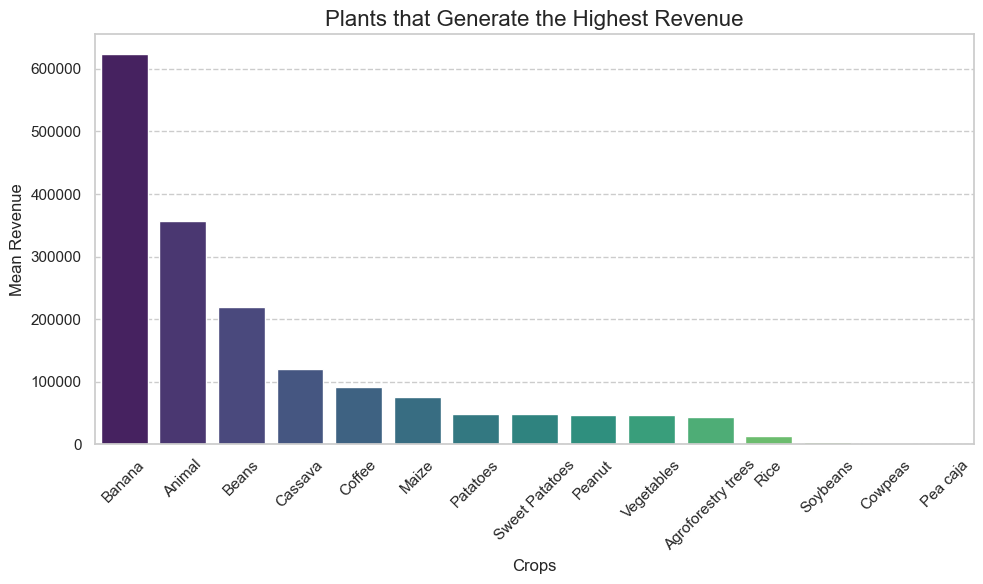

In [21]:
# Step 1: Calculate mean revenue for each crop
revenue_data = []
for crop, (revenue_col, _) in crop_columns.items():
    mean_revenue = df[revenue_col].mean() if revenue_col in df.columns else 0
    revenue_data.append({
        'Crop': crop,
        'Mean Revenue': mean_revenue
    })

# Step 2: Create a DataFrame for revenue data
revenue_df = pd.DataFrame(revenue_data)

# Step 3: Sort the DataFrame by Mean Revenue in descending order
revenue_df.sort_values(by='Mean Revenue', ascending=False, inplace=True)

# Step 4: Plot the plants that generate the highest revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_df, x='Crop', y='Mean Revenue', palette='viridis')

# Adding plot details
plt.title('Plants that Generate the Highest Revenue', fontsize=16)
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Mean Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


The difference between highest revenue and highest net profit is explained by the costs associated with producing each crop. Here's why bananas have the highest revenue but not the highest net profit:

High Revenue, High Costs: Bananas generate a lot of revenue because they are widely cultivated or sell at a high price. However, the costs associated with growing bananas (like labor, fertilizers, water, and maintenance) is also high. This mean that while the total revenue from bananas is significant, the costs eat into the profit.

Net Profit = Revenue - Costs: Net profit is calculated as the difference between revenue and production costs. Even though bananas generate high revenue, if the production costs are equally high, the net profit (revenue minus costs) will not be as large compared to other crops that might have lower costs but similar or slightly lower revenue.

Other Crops Might Have Lower Costs: Crops with lower revenues but also lower costs (e.g., beans, maize) could end up with a higher net profit margin. If a crop has relatively low costs compared to its revenue, the net profit could be higher, even if the total revenue is lower than bananas.

### OPTIMIZATION

In [22]:
# Define the columns for costs and revenues
cost_columns = [
    'Coffee_cost', 'Banana_cost', 'Peans_Cost', 'Beans_Cost',
    'Soybeans_cost', 'Patatoes_cost', 'Szeet_patatoes_cost', 
    'Cassava_Cost', 'Peanut_Cost', 'Maize_Cost', 'Rice_Cost', 
    'Pea_caja', 'Cowpeas_Area.1', 'Agroforestry trees_Cost', 
    'Legumes_Cost'
]

revenue_columns = [
    'Net income banana', 'Net Income peas', 'Net income Beans',
    'Net Income Soybeans', 'Net income Patatoes',
    'Net Income Sweet Patatoes', 'Net Income Cassava', 
    'Net Income peanut', 'Net Income Maize', 'Net Income Rice', 
    'Net Income Pea caja', 'Net Income Cow Peas', 
    'Net Income Agroforestry trees', 'Net income Legume', 
    'Net Income Coffee'
]

# Step 1: Calculate Total Costs (average of cost columns)
df['Total_Costs'] = df[cost_columns].mean(axis=1)  # Average across cost columns

# Step 2: Calculate Total Revenue (sum of revenue columns)
df['Total_Revenue'] = df[revenue_columns].sum(axis=1)  # Sum across revenue columns

# Step 3: Calculate Net Profit based on Total Revenue and Total Costs
df['Net_Profit'] = df['Total_Revenue'] - df['Total_Costs']

In [23]:


# Display the updated DataFrame with new columns
print(df[['Total_Costs', 'Total_Revenue', 'Net_Profit']])


      Total_Costs  Total_Revenue    Net_Profit
0     2500.000000         254450  2.519500e+05
1     5815.000000         314025  3.082100e+05
2     5606.666667        1159050  1.153443e+06
3     6180.000000         905400  8.992200e+05
4     2083.333333         861550  8.594667e+05
..            ...            ...           ...
159   2746.666667        1877870  1.875123e+06
160  53800.000000        4110000  4.056200e+06
161   4133.333333        3538300  3.534167e+06
162   3066.666667        2837600  2.834533e+06
163  35373.333333        3845400  3.810027e+06

[164 rows x 3 columns]


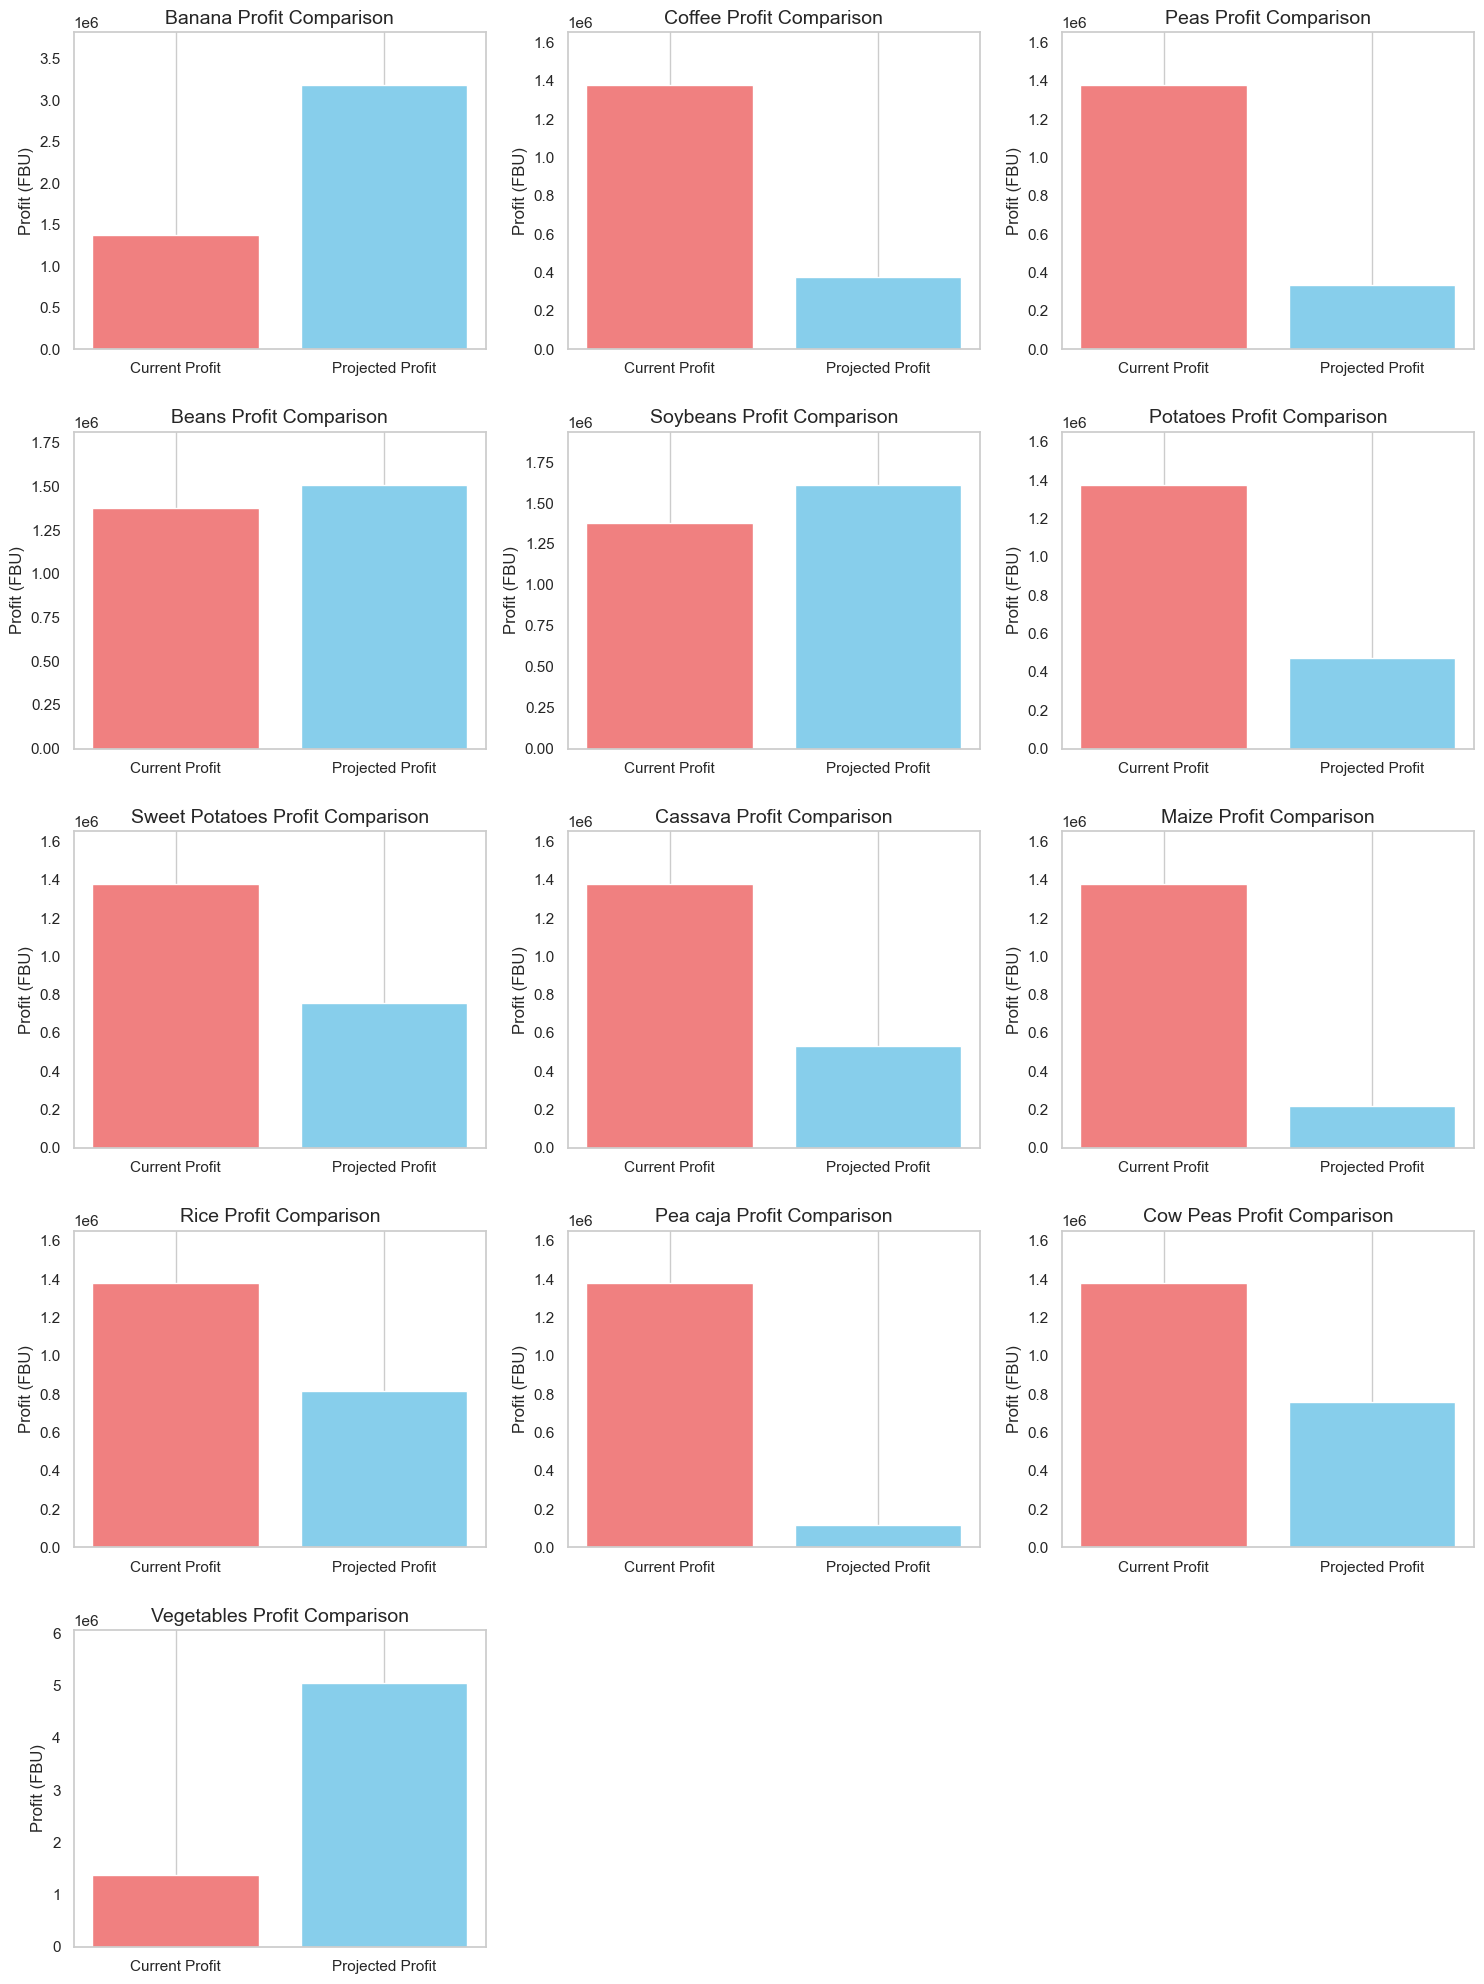

              Crop  Current_Profit  Projected_Profit
0           Banana    1.377737e+06      3.180318e+06
1           Coffee    1.377737e+06      3.787212e+05
2             Peas    1.377737e+06      3.365401e+05
3            Beans    1.377737e+06      1.511736e+06
4         Soybeans    1.377737e+06      1.613275e+06
5         Potatoes    1.377737e+06      4.718042e+05
6   Sweet Potatoes    1.377737e+06      7.561602e+05
7          Cassava    1.377737e+06      5.332028e+05
8            Maize    1.377737e+06      2.203243e+05
9             Rice    1.377737e+06      8.187835e+05
10        Pea caja    1.377737e+06      1.182934e+05
11        Cow Peas    1.377737e+06      7.568987e+05
12      Vegetables    1.377737e+06      5.053037e+06


In [25]:
# Step 1: Total surface area
total_surface_area = df['Total_Area_Square meters'].mean()

# Step 2: Calculate the average current profit
average_current_profit = df['Net_Profit'].mean()

# Step 3: Define the crops and their respective surface area and profit columns
crop_data = {
    'Banana': {
        'area': 'Banana_area',
        'cost': 'Banana_cost',
        'revenue': 'Net income banana'
    },
    'Coffee': {
        'area': 'Coffee_Area',
        'cost': 'Coffee_cost',
        'revenue': 'Net Income Coffee'
    },
    'Peas': {
        'area': 'Peas_Area',
        'cost': 'Peans_Cost',
        'revenue': 'Net Income peas'
    },
    'Beans': {
        'area': 'Beans_Area',
        'cost': 'Beans_Cost',
        'revenue': 'Net income Beans'
    },
    'Soybeans': {
        'area': 'Soybeans_Area',
        'cost': 'Soybeans_cost',
        'revenue': 'Net Income Soybeans'
    },
    'Potatoes': {
        'area': 'Patatoes_Area',
        'cost': 'Patatoes_cost',
        'revenue': 'Net income Patatoes'
    },
    'Sweet Potatoes': {
        'area': 'Sweet_potato_Area',
        'cost': 'Szeet_patatoes_cost',
        'revenue': 'Net Income Sweet Patatoes'
    },
    'Cassava': {
        'area': 'Cassava_Area',
        'cost': 'Cassava_Cost',
        'revenue': 'Net Income Cassava'
    },
    'Maize': {
        'area': 'Maize_Area',
        'cost': 'Maize_Cost',
        'revenue': 'Net Income Maize'
    },
    'Rice': {
        'area': 'Rice_Area',
        'cost': 'Rice_Cost',
        'revenue': 'Net Income Rice'
    },
    'Pea caja': {
        'area': 'Pea_caja_Area',
        'cost': 'Pea_caja',
        'revenue': 'Net Income Pea caja'
    },
    'Cow Peas': {
        'area': 'Cowpeas_Area',
        'cost': 'Cowpeas_Area.1',
        'revenue': 'Net Income Cow Peas'
    },
    'Vegetables': {
        'area': 'Vegetables_area',
        'cost': 'Legumes_Cost',
        'revenue': 'Net income Legume'
    },
}

# Step 4: Calculate projected profit if each crop occupied the entire land
projected_profits = {}
for crop, data in crop_data.items():
    # want to calculate the average area of the crop if area is greater than zero
    #avg_area = df[df[data['area']] > 0].mean()
    plant_avg_area = df[data['area']].mean() # Average area for the crop
    current_cost = df[data['cost']].mean()  # Average cost for the crop
    current_revenue = df[data['revenue']].mean()  # Average revenue for the crop
    
    projected_costs = (total_surface_area / plant_avg_area) * current_cost
    projected_revenue = (total_surface_area / plant_avg_area) * current_revenue
    projected_profit = projected_revenue - projected_costs
    
    projected_profits[crop] = {
        'Current_Profit': average_current_profit,
        'Projected_Profit': projected_profit
    }

# Step 5: Create a summary DataFrame for visualization
summary_df = pd.DataFrame.from_dict(projected_profits, orient='index').reset_index()
summary_df.columns = ['Crop', 'Current_Profit', 'Projected_Profit']
# Step 6: Create subplots to visualize the profits
num_crops = len(summary_df)
num_cols = 3  # Number of columns in the subplot grid
num_rows = np.ceil(num_crops / num_cols).astype(int)  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten() # Flatten the axes array for easy indexing

for i, row in summary_df.iterrows():
    axes[i].bar(['Current Profit', 'Projected Profit'], [row['Current_Profit'], row['Projected_Profit']],
                 color=['lightcoral', 'skyblue'])
    axes[i].set_title(f"{row['Crop']} Profit Comparison", fontsize=14)
    axes[i].set_ylabel('Profit (FBU)', fontsize=12)
    axes[i].set_ylim(0, max(row['Current_Profit'], row['Projected_Profit']) * 1.2)  # Adjust y-axis limit
    axes[i].grid(axis='y')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display the summary DataFrame for review
print(summary_df)


this is the total surface area1 :  24218.268292682926


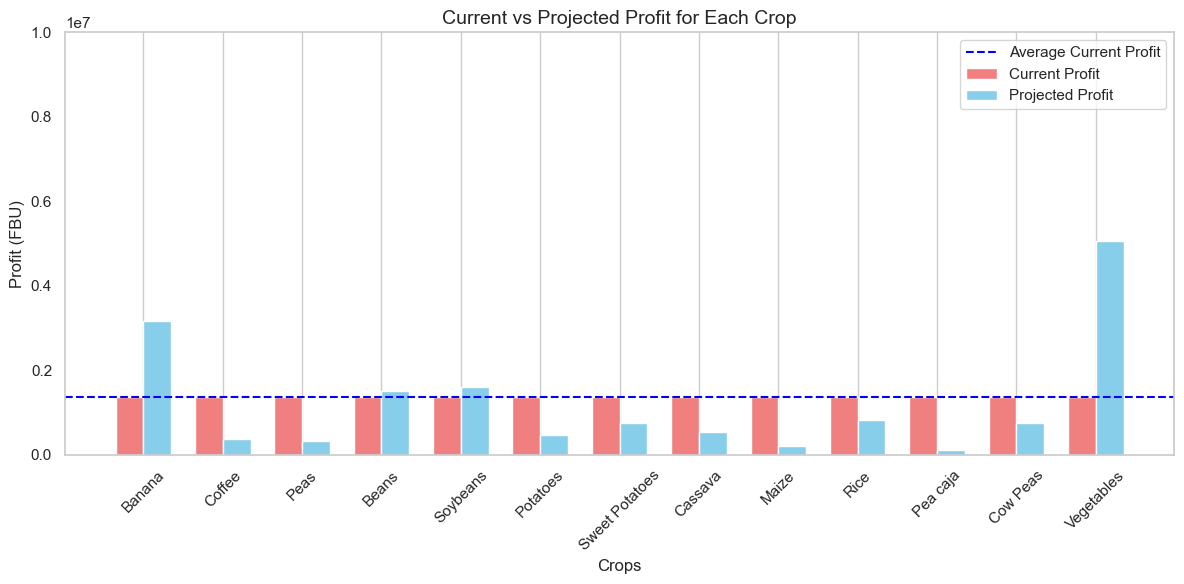

              Crop  Current_Profit  Projected_Profit
0           Banana    1.377737e+06      3.180318e+06
1           Coffee    1.377737e+06      3.787212e+05
2             Peas    1.377737e+06      3.365401e+05
3            Beans    1.377737e+06      1.511736e+06
4         Soybeans    1.377737e+06      1.613275e+06
5         Potatoes    1.377737e+06      4.718042e+05
6   Sweet Potatoes    1.377737e+06      7.561602e+05
7          Cassava    1.377737e+06      5.332028e+05
8            Maize    1.377737e+06      2.203243e+05
9             Rice    1.377737e+06      8.187835e+05
10        Pea caja    1.377737e+06      1.182934e+05
11        Cow Peas    1.377737e+06      7.568987e+05
12      Vegetables    1.377737e+06      5.053037e+06


In [26]:

# Step 1: Total surface area
total_surface_area = df['Total_Area_Square meters'].mean()
print("this is the total surface area1 : ", total_surface_area)

# Step 2: Calculate the average current profit
average_current_profit = df['Net_Profit'].mean()

# Step 3: Define the crops and their respective surface area and profit columns
crop_data = {
    'Banana': {
        'area': 'Banana_area',
        'cost': 'Banana_cost',
        'revenue': 'Net income banana'
    },
    'Coffee': {
        'area': 'Coffee_Area',
        'cost': 'Coffee_cost',
        'revenue': 'Net Income Coffee'
    },
    'Peas': {
        'area': 'Peas_Area',
        'cost': 'Peans_Cost',
        'revenue': 'Net Income peas'
    },
    'Beans': {
        'area': 'Beans_Area',
        'cost': 'Beans_Cost',
        'revenue': 'Net income Beans'
    },
    'Soybeans': {
        'area': 'Soybeans_Area',
        'cost': 'Soybeans_cost',
        'revenue': 'Net Income Soybeans'
    },
    'Potatoes': {
        'area': 'Patatoes_Area',
        'cost': 'Patatoes_cost',
        'revenue': 'Net income Patatoes'
    },
    'Sweet Potatoes': {
        'area': 'Sweet_potato_Area',
        'cost': 'Szeet_patatoes_cost',
        'revenue': 'Net Income Sweet Patatoes'
    },
    'Cassava': {
        'area': 'Cassava_Area',
        'cost': 'Cassava_Cost',
        'revenue': 'Net Income Cassava'
    },
    'Maize': {
        'area': 'Maize_Area',
        'cost': 'Maize_Cost',
        'revenue': 'Net Income Maize'
    },
    'Rice': {
        'area': 'Rice_Area',
        'cost': 'Rice_Cost',
        'revenue': 'Net Income Rice'
    },
    'Pea caja': {
        'area': 'Pea_caja_Area',
        'cost': 'Pea_caja',
        'revenue': 'Net Income Pea caja'
    },
    'Cow Peas': {
        'area': 'Cowpeas_Area',
        'cost': 'Cowpeas_Area.1',
        'revenue': 'Net Income Cow Peas'
    },
    'Vegetables': {
        'area': 'Vegetables_area',
        'cost': 'Legumes_Cost',
        'revenue': 'Net income Legume'
    },
}

# Step 4: Calculate projected profit if each crop occupied the entire land
projected_profits = {}
for crop, data in crop_data.items():
    avg_area = df[data['area']].mean()  # Average area for the crop
    current_cost = df[data['cost']].mean()  # Average cost for the crop
    current_revenue = df[data['revenue']].mean()  # Average revenue for the crop
    
    projected_costs = (total_surface_area / avg_area) * current_cost
    projected_revenue = (total_surface_area / avg_area) * current_revenue
    projected_profit = projected_revenue - projected_costs
    
    projected_profits[crop] = {
        'Current_Profit': average_current_profit,
        'Projected_Profit': projected_profit
    }

# Step 5: Create a summary DataFrame for visualization
summary_df = pd.DataFrame.from_dict(projected_profits, orient='index').reset_index()
summary_df.columns = ['Crop', 'Current_Profit', 'Projected_Profit']

# Step 6: Create a combined bar plot for all crops
bar_width = 0.35  # Width of the bars
x = np.arange(len(summary_df['Crop']))  # X locations for the groups

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, summary_df['Current_Profit'], width=bar_width, label='Current Profit', color='lightcoral')
plt.bar(x + bar_width / 2, summary_df['Projected_Profit'], width=bar_width, label='Projected Profit', color='skyblue')

# Adding labels and title
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Profit (FBU)', fontsize=12)
plt.title('Current vs Projected Profit for Each Crop', fontsize=14)
plt.xticks(x, summary_df['Crop'], rotation=45)
plt.axhline(y=average_current_profit, color='blue', linestyle='--', label='Average Current Profit')

# Set y-axis limit to accommodate current profit visibility
current_profit_limit = average_current_profit
plt.ylim(0, 1e7)

plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the summary DataFrame for review
print(summary_df)


In [182]:
print(summary_df)

              Crop  Current_Profit  Projected_Profit
0           Banana    1.377737e+06      3.180318e+06
1           Coffee    1.377737e+06      3.787212e+05
2             Peas    1.377737e+06      3.365401e+05
3            Beans    1.377737e+06      1.511736e+06
4         Soybeans    1.377737e+06      1.613275e+06
5         Potatoes    1.377737e+06      4.718042e+05
6   Sweet Potatoes    1.377737e+06      7.561602e+05
7          Cassava    1.377737e+06      5.332028e+05
8            Maize    1.377737e+06      2.203243e+05
9             Rice    1.377737e+06      8.187835e+05
10        Pea caja    1.377737e+06      1.182934e+05
11        Cow Peas    1.377737e+06      7.568987e+05
12         Legumes    1.377737e+06      5.053037e+06


C:\Users\PC\AppData\Local\Temp\ipykernel_10776\675449050.py:142: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 1, 0.95])


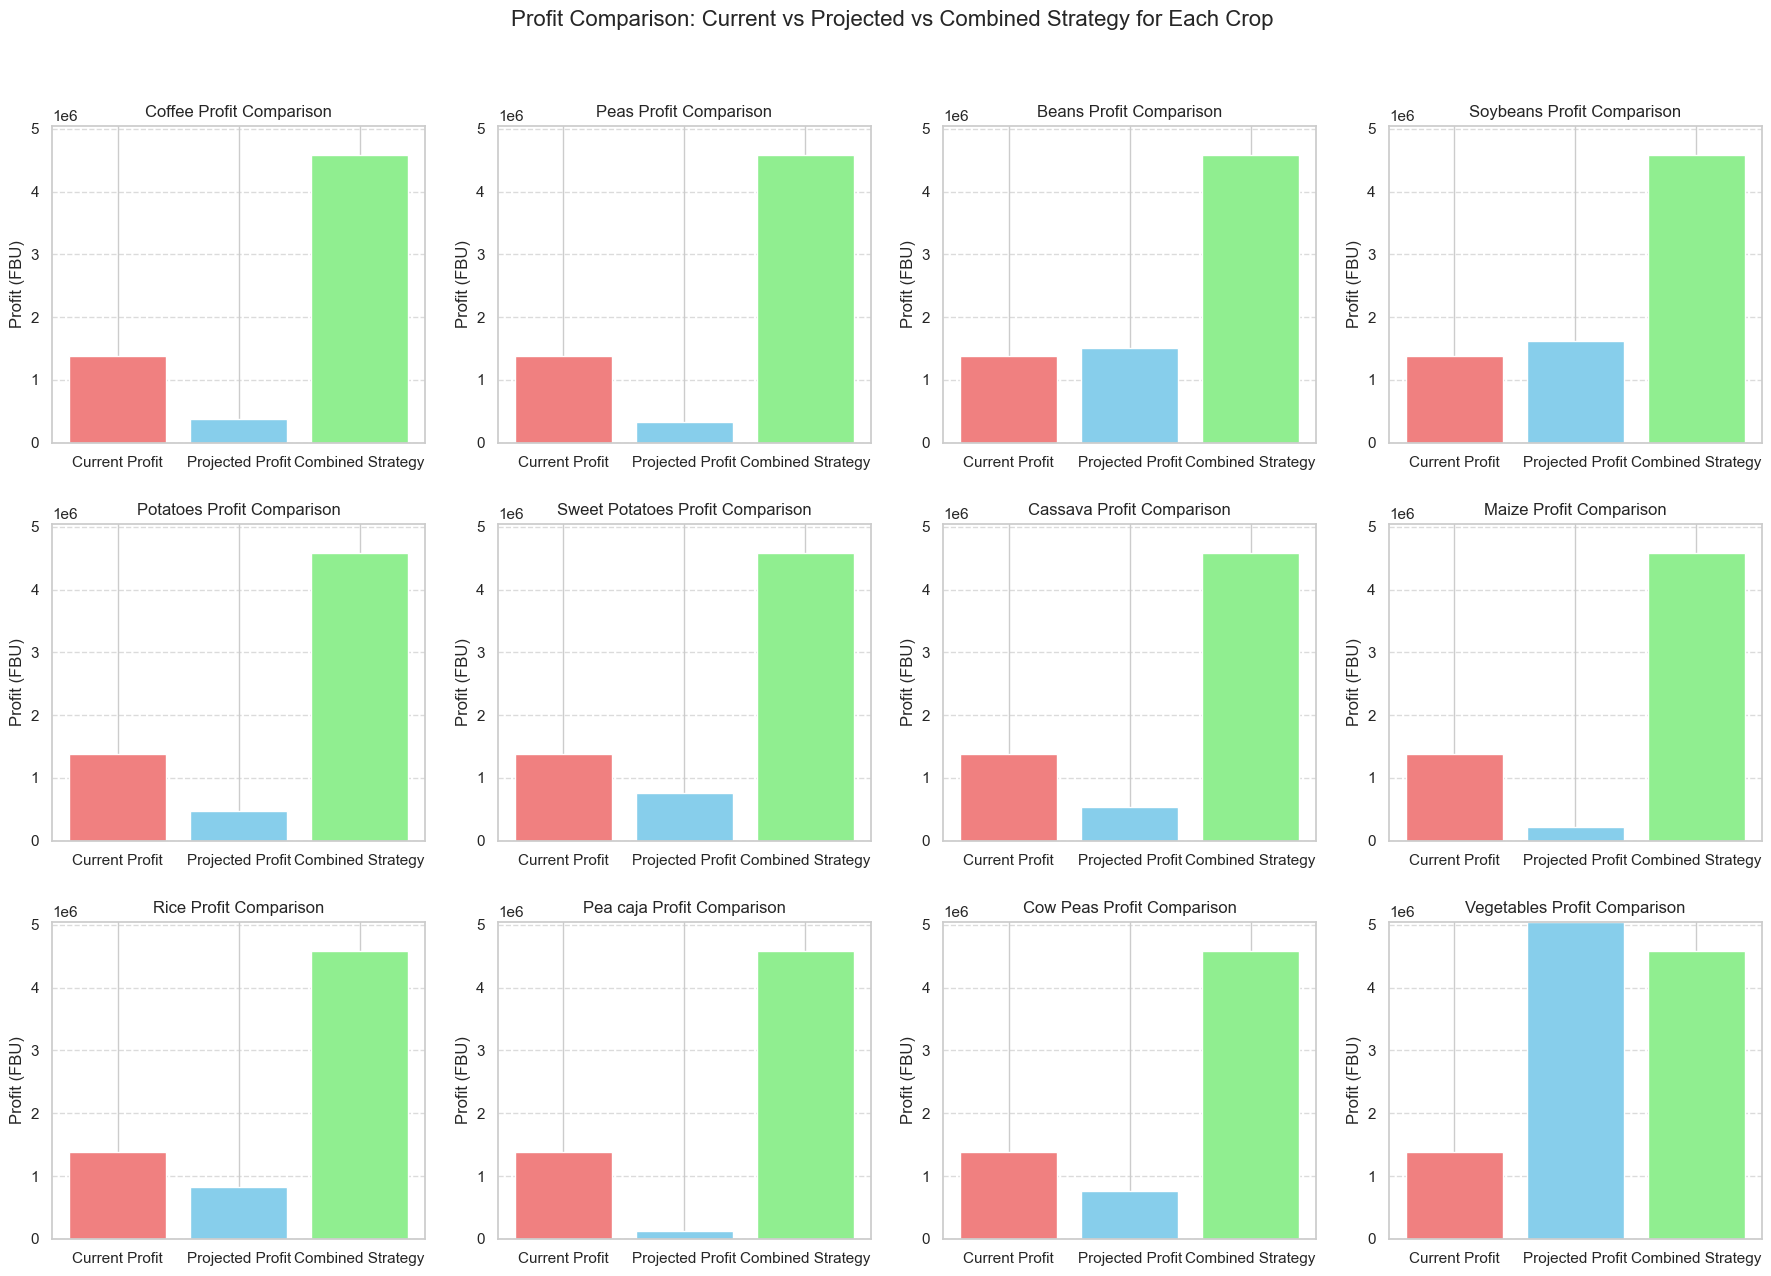

In [28]:
# Step 1: Total surface area (in square meters)
total_surface_area = df['Total_Area_Square meters'].mean()

# Average profit and data columns for each crop as shown in your data
crop_data = {
    'Coffee': {
        'area': 'Coffee_Area',
        'cost': 'Coffee_cost',
        'revenue': 'Net Income Coffee'
    },
    'Peas': {
        'area': 'Peas_Area',
        'cost': 'Peans_Cost',
        'revenue': 'Net Income peas'
    },
    'Beans': {
        'area': 'Beans_Area',
        'cost': 'Beans_Cost',
        'revenue': 'Net income Beans'
    },
    'Soybeans': {
        'area': 'Soybeans_Area',
        'cost': 'Soybeans_cost',
        'revenue': 'Net Income Soybeans'
    },
    'Potatoes': {
        'area': 'Patatoes_Area',
        'cost': 'Patatoes_cost',
        'revenue': 'Net income Patatoes'
    },
    'Sweet Potatoes': {
        'area': 'Sweet_potato_Area',
        'cost': 'Szeet_patatoes_cost',
        'revenue': 'Net Income Sweet Patatoes'
    },
    'Cassava': {
        'area': 'Cassava_Area',
        'cost': 'Cassava_Cost',
        'revenue': 'Net Income Cassava'
    },
    'Maize': {
        'area': 'Maize_Area',
        'cost': 'Maize_Cost',
        'revenue': 'Net Income Maize'
    },
    'Rice': {
        'area': 'Rice_Area',
        'cost': 'Rice_Cost',
        'revenue': 'Net Income Rice'
    },
    'Pea caja': {
        'area': 'Pea_caja_Area',
        'cost': 'Pea_caja',
        'revenue': 'Net Income Pea caja'
    },
    'Cow Peas': {
        'area': 'Cowpeas_Area',
        'cost': 'Cowpeas_Area.1',
        'revenue': 'Net Income Cow Peas'
    },
    'Vegetables': {
        'area': 'Vegetables_area',
        'cost': 'Legumes_Cost',
        'revenue': 'Net income Legume'
    },
}



cassava_spacing = 3  # 2 meters spacing = 4 square meters per plant
cassava_hole_area = 1/3  # Each cassava plant occupies 1/3 square meters within this spacing
num_cassava_plants = total_surface_area / cassava_spacing
cassava_total_area = num_cassava_plants * cassava_hole_area

# Calculate remaining area after planting cassava
remaining_area_after_cassava = total_surface_area - cassava_total_area

# Remaining area is allocated to beans
beans_total_area = remaining_area_after_cassava

# Cassava projected profit
cassava_cost_per_unit_area = df[crop_data['Cassava']['cost']].mean() / df[crop_data['Cassava']['area']].mean()
cassava_revenue_per_unit_area = df[crop_data['Cassava']['revenue']].mean() / df[crop_data['Cassava']['area']].mean()
cassava_projected_profit = (cassava_revenue_per_unit_area - cassava_cost_per_unit_area) * cassava_total_area

# Beans projected profit
beans_cost_per_unit_area = df[crop_data['Beans']['cost']].mean() / df[crop_data['Beans']['area']].mean()
beans_revenue_per_unit_area = df[crop_data['Beans']['revenue']].mean() / df[crop_data['Beans']['area']].mean()
beans_projected_profit = (beans_revenue_per_unit_area - beans_cost_per_unit_area) * beans_total_area

# Total projected profit for the combination
combined_profit = summary_df.iloc[0]['Projected_Profit'] + cassava_projected_profit + beans_projected_profit

# Step 4: Calculate profits for each crop if planted alone
projected_profits = {}
average_current_profit = df['Net_Profit'].mean()  # Average of current profits

for crop, data in crop_data.items():
    avg_area = df[data['area']].mean()  # Average area for the crop
    current_cost = df[data['cost']].mean()  # Average cost for the crop
    current_revenue = df[data['revenue']].mean()  # Average revenue for the crop
    
    projected_costs = (total_surface_area / avg_area) * current_cost
    projected_revenue = (total_surface_area / avg_area) * current_revenue
    projected_profit = projected_revenue - projected_costs
    
    projected_profits[crop] = {
        'Current_Profit': average_current_profit,
        'Projected_Profit': projected_profit,
        'Combined_Strategy_Profit': combined_profit
    }

# Step 5: Plot comparison for each crop
summary_df2 = pd.DataFrame.from_dict(projected_profits, orient='index').reset_index()
summary_df2.columns = ['Crop', 'Current_Profit', 'Projected_Profit', 'Combined_Strategy_Profit']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 13))  # Adjust layout for readability
axes = axes.flatten()  # Flatten the 3x4 grid for easier indexing
fig.tight_layout(pad=5.0)  # Add space between subplots

for i, crop in enumerate(summary_df2['Crop']):
    profits = [
        summary_df2.loc[i, 'Current_Profit'],
        summary_df2.loc[i, 'Projected_Profit'],
        summary_df2.loc[i, 'Combined_Strategy_Profit']
    ]
    
    labels = ['Current Profit', 'Projected Profit', 'Combined Strategy']
    colors = ['lightcoral', 'skyblue', 'lightgreen']
    
    axes[i].bar(labels, profits, color=colors)
    axes[i].set_title(f'{crop} Profit Comparison')
    axes[i].set_ylabel('Profit (FBU)')
    axes[i].set_ylim(0, max(summary_df2['Projected_Profit'].max(), average_current_profit))
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Profit Comparison: Current vs Projected vs Combined Strategy for Each Crop', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [29]:
print(summary_df2)

              Crop  Current_Profit  Projected_Profit  Combined_Strategy_Profit
0           Coffee    1.377737e+06      3.787212e+05              4.583328e+06
1             Peas    1.377737e+06      3.365401e+05              4.583328e+06
2            Beans    1.377737e+06      1.511736e+06              4.583328e+06
3         Soybeans    1.377737e+06      1.613275e+06              4.583328e+06
4         Potatoes    1.377737e+06      4.718042e+05              4.583328e+06
5   Sweet Potatoes    1.377737e+06      7.561602e+05              4.583328e+06
6          Cassava    1.377737e+06      5.332028e+05              4.583328e+06
7            Maize    1.377737e+06      2.203243e+05              4.583328e+06
8             Rice    1.377737e+06      8.187835e+05              4.583328e+06
9         Pea caja    1.377737e+06      1.182934e+05              4.583328e+06
10        Cow Peas    1.377737e+06      7.568987e+05              4.583328e+06
11      Vegetables    1.377737e+06      5.053037e+06